<a href="https://colab.research.google.com/github/J0ug/the-labor-market/blob/main/%D0%A1%D0%A2%D0%90%D0%96%D0%98%D0%A0%D0%9E%D0%92%D0%9A%D0%90_%D0%A2%D0%93%D0%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Изучение данных

##1.1.Импорт необходимых библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import scipy
import scipy.stats as stats
import re
from collections import Counter
from scipy.stats import shapiro, skew, kurtosis, probplot

##1.2.Чтение файла и обзор датасета

*Загрузим датасет и посмотрим на его содержимое*

In [ ]:
url = 'https://drive.google.com/uc?export=download&id=1jsimGwHpFGAYJGLZDOidmrJRJIupDui7'
df = pd.read_csv(url)

In [ ]:
df.head()

,id,name,professional_roles,experience,schedule,employment,employer,accept_handicapped,key_skills,area,salary
0,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",1-3,full_day,full,Стройкомплектсервис,False,"['ANSYS', 'AutoCAD', 'Autodesk Inventor', 'Sol...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":75000.0,""salary_to"":100000.0}"
1,72121730,Специалист по доставке (Подработка),Курьер,0,shift,part,Квазар,False,['Грамотная речь'],"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":60000.0,""salary_to"":110000.0}"
2,72122239,Удаленный оператор ПК / сотрудник на ввод данных,"Менеджер по продажам, менеджер по работе с кли...",0,remote,part,Staff-Linear,True,"['Грамотная речь', 'Базовые знания ПК']","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":25000.0,""salary_to"":50000.0}"
3,72123219,Повар линии раздачи,"Официант, бармен, бариста",0,shift,full,AYS GROUP,False,"['Грамотная речь', 'Грамотная речь', 'Работа в...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":null,""salary_to"":35000.0}"
4,72123390,Повар в магазин SPAR (ул.Киевская 139),"Повар, пекарь, кондитер",0,full_day,full,"ЛАМА, Группа компаний",False,"['Коммуникативная грамотность', 'Обучаемость и...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":28000.0,""salary_to"":36000.0}"


In [ ]:
df.shape

(20178, 11)

*С помощью метода info() узнаем краткую информацию о датасете*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20178 entries, 0 to 20177
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  20178 non-null  int64 
 1   name                20178 non-null  object
 2   professional_roles  20178 non-null  object
 3   experience          20178 non-null  object
 4   schedule            20178 non-null  object
 5   employment          20178 non-null  object
 6   employer            20178 non-null  object
 7   accept_handicapped  20178 non-null  bool  
 8   key_skills          20178 non-null  object
 9   area                20178 non-null  object
 10  salary              20178 non-null  object
dtypes: bool(1), int64(1), object(9)
memory usage: 1.6+ MB


## 1.3.Выявление проблем

*Проверим датасет на наличие дубликатов*

In [ ]:
df.duplicated().sum()

np.int64(178)

* **Проблема №1**: В датасете содержатся дубликаты, которые нужно будет удалить*

*Проверим столбцы на наличие пропусков*

In [ ]:
df.isnull().sum()


,0
id,0
name,0
professional_roles,0
experience,0
schedule,0
employment,0
employer,0
accept_handicapped,0
key_skills,0
area,0


*На первый взгляд кажется, что пропусков нет*

***Посмотрим на датасет внимательнее и выявим основные проблемы***

In [ ]:
df['name'].head()

,name
0,"Инженер-конструктор (в г. Электрогорск, Москов..."
1,Специалист по доставке (Подработка)
2,Удаленный оператор ПК / сотрудник на ввод данных
3,Повар линии раздачи
4,Повар в магазин SPAR (ул.Киевская 139)


**Проблема №2**    В круглых скобках содержится лишняя информация, которая может помешать анализу. Ее необходимо удалить
**Проблема №3**  Встречаются вакансии содержащие символ '/' (	Удаленный оператор ПК / сотрудник на ввод данных), что также может помешать анализу



In [ ]:
df['experience'].dtype

dtype('O')

**Проблема №4** Столбец experience имеет тип object, но содержит в себе числовые значения

In [ ]:
df['key_skills'][3]

"['Грамотная речь', 'Грамотная речь', 'Работа в команде', 'Работа в команде']"

**Проблема №5** в поле key_skills могут быть повторения, что затруднит анализ

In [ ]:
df['area'][13]


'{"country":"Россия","region":"Томская область","district":"Сибирский","city":"Первомайское (Томская область)"}'



*   **Проблема №6** данные в столбце area представлены в виде словаря, что затруднит работу с датасетом
*   **Проблема №7** в некоторых полях имеется избыточная информация (например в поле city)
* **Проблема №8** не исключено, что внутри словаря в некоторых полях могут быть пропуски (null значения). Требуется дополнительная проверка




In [ ]:
df['salary'][3]

'{"salary_from":null,"salary_to":35000.0}'

* **Проблема №9** данные в поле salary так же как и в area представлены в виде словаря, что затруднит работу
* **Проблема №10** в полях salary_from и salary_to могут быть пропуски (как в приведенном выше примере), что потребует дополнительной обработки

# 2.Предобработка данных

##2.1.Обработка дубликатов




In [ ]:
df_copy = df.copy() #скопируем наш исходный датасет

In [ ]:
df_copy.duplicated().sum()

np.int64(178)

In [ ]:
df_copy.duplicated(subset='id').sum()

np.int64(178)

In [ ]:
df_copy.drop_duplicates(inplace=True)

In [ ]:
df_copy.shape

(20000, 11)

##2.2.Исключение признаков, не несущих ценности в рамках данного кейса

In [ ]:
df_copy.drop(columns = 'id', inplace = True) #удаляем столбец id

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                20000 non-null  object
 1   professional_roles  20000 non-null  object
 2   experience          20000 non-null  object
 3   schedule            20000 non-null  object
 4   employment          20000 non-null  object
 5   employer            20000 non-null  object
 6   accept_handicapped  20000 non-null  bool  
 7   key_skills          20000 non-null  object
 8   area                20000 non-null  object
 9   salary              20000 non-null  object
dtypes: bool(1), object(9)
memory usage: 1.5+ MB


## 2.3.Распаковка вложенных структур данных

In [ ]:
df_copy.sample(5)

,name,professional_roles,experience,schedule,employment,employer,accept_handicapped,key_skills,area,salary
357,Конструктор CAD-CAM механообрабатывающего прои...,"Инженер-конструктор, инженер-проектировщик",3-6,full_day,full,"Алабуга, ОЭЗ ППТ",False,"['3D моделирование', 'AutoCAD', 'SolidWorks', ...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":250000.0,""salary_to"":null}"
13809,Повар,"Повар, пекарь, кондитер",0,shift,full,"Мама, я дома",False,"['Грамотная речь', 'Базовые знания ПК', 'Работ...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":null,""salary_to"":45000.0}"
12131,Электромонтер по оперативным переключениям,"Инженер-энергетик, инженер-электрик",1-3,full_day,full,ТЭСС,False,"['Самоорганизованность', 'Ответственность', 'Р...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":45000.0,""salary_to"":60000.0}"
10378,Кассир в Burger King,Кассир-операционист,0,flexible,full,Бизнес Для Бизнеса,False,"['Грамотная речь', 'Базовые знания ПК', 'Работ...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":26000.0,""salary_to"":null}"
6160,Специалист по тестированию ПО,Тестировщик,1-3,flexible,full,Citeck,False,"['Java/Kotlin/Scala', 'SQL', 'QA / Тестирование']","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":null,""salary_to"":null}"


###*area*

In [ ]:
def text_to_json(text):
    ''' функция, которая распаковывает наименование города с помощью модуля json,
        при этом обрабатывает пропуски '''
    if pd.isna(text):
        result = 'Город не указан'
    else:
        result = json.loads(text.replace("'", '"'))['city']
    return result


In [ ]:
# применяем функцию к столбцу
df_copy['area'] = df_copy['area'].apply(text_to_json)

In [ ]:
df_copy.area

,area
0,Томск
1,Томск
2,Томск
3,Томск
4,Томск
...,...
19995,Томск
19996,Томск
19997,Томск
19998,Томск


In [ ]:
df_copy.area.value_counts()

,count
area,
Томск,18039
Северск (Томская область),808
Стрежевой,279
Асино,110
Колпашево,100
Первомайское (Томская область),49
Зональная Станция,38
Светлый (Томская область),37
Каргасок,35


Видим, что функция отработала корректоно, но стоит убрать **(Томская область)** после названия города/села(деревня), так как все города и так из томской области

In [ ]:
def remove_text_in_parentheses(text):
  """Удаляет текст в круглых скобках из строки."""
  return re.sub(r'\(.*\)', '', text).strip()

df_copy['area'] = df_copy['area'].apply(remove_text_in_parentheses)

In [ ]:
df_copy.area.value_counts() #убедимся что функция корректно отработала

,count
area,
Томск,18039
Северск,808
Стрежевой,279
Асино,110
Колпашево,100
Первомайское,49
Зональная Станция,38
Светлый,37
Каргасок,35


Данные записались корректно, все города написано в одном регистре, поэтому можно не применять функцию *lower()* для перевода их в нижний регистр

###*key_skills*

Как ранее говорилось, в признаке key_skills имеются повторения. Нужно привести все в нижний регистр и убрать повторы

In [ ]:
df_copy.head()

,name,professional_roles,experience,schedule,employment,employer,accept_handicapped,key_skills,area,salary
0,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",1-3,full_day,full,Стройкомплектсервис,False,"['ANSYS', 'AutoCAD', 'Autodesk Inventor', 'Sol...",Томск,"{""salary_from"":75000.0,""salary_to"":100000.0}"
1,Специалист по доставке (Подработка),Курьер,0,shift,part,Квазар,False,['Грамотная речь'],Томск,"{""salary_from"":60000.0,""salary_to"":110000.0}"
2,Удаленный оператор ПК / сотрудник на ввод данных,"Менеджер по продажам, менеджер по работе с кли...",0,remote,part,Staff-Linear,True,"['Грамотная речь', 'Базовые знания ПК']",Томск,"{""salary_from"":25000.0,""salary_to"":50000.0}"
3,Повар линии раздачи,"Официант, бармен, бариста",0,shift,full,AYS GROUP,False,"['Грамотная речь', 'Грамотная речь', 'Работа в...",Томск,"{""salary_from"":null,""salary_to"":35000.0}"
4,Повар в магазин SPAR (ул.Киевская 139),"Повар, пекарь, кондитер",0,full_day,full,"ЛАМА, Группа компаний",False,"['Коммуникативная грамотность', 'Обучаемость и...",Томск,"{""salary_from"":28000.0,""salary_to"":36000.0}"


In [ ]:
def process_key_skills_corrected(skills_str):
    if pd.isna(skills_str):
        return []

    # Убедимся, что это строка перед обработкой
    if not isinstance(skills_str, str):
        return []

    # Удаляем квадратные скобки и одинарные кавычки в начале и конце строки
    # Используем регулярное выражение для более надежного удаления
    cleaned_str = re.sub(r"^\[|\]$", "", skills_str).strip()
    cleaned_str = cleaned_str.replace("'", "") # Удаляем одинарные кавычки

    # Разбиваем строку на отдельные навыки по запятой
    skills_list = [skill.strip() for skill in cleaned_str.split(',')]

    # Стандартизируем написание (нижний регистр)
    skills_list = [skill.lower() for skill in skills_list]

    # Удаляем пустые строки, которые могли появиться после strip()
    skills_list = [skill for skill in skills_list if skill]

    # Удаляем дубликаты навыков в пределах одной строки
    skills_list = list(set(skills_list))

    return skills_list

# Применяем исправленную функцию к столбцу key_skills
df_copy['key_skills_processed'] = df_copy['key_skills'].apply(process_key_skills_corrected)

In [ ]:
df_copy.key_skills_processed.value_counts()

,count
key_skills_processed,
[работа в команде],499
"[знания в области логистики, управление грузовым автомобилем]",175
"[грамотная речь, работа в команде, базовые знания пк]",157
[базовые знания пк],117
"[грамотная речь, работа в команде]",116
...,...
"[поиск и привлечение новых клиентов, продажи, работа в команде, целеустремленность и работоспособность, составление договоров, коммуникативная грамотность, консультирование и ведение клиентов]",1
"[ведение отчетности, подбор персонала, ведение кадрового документооборота]",1
"[windows movie maker, креативное мышление, базовые знания пк, работа в команде, актерское мастерство]",1


Видим, что функция отработала корректно. Есть много значений в количестве 1 значение.

In [ ]:
df_copy.drop(columns='key_skills', inplace=True)

In [ ]:
df_copy.head()

,name,professional_roles,experience,schedule,employment,employer,accept_handicapped,area,salary,key_skills_processed
0,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",1-3,full_day,full,Стройкомплектсервис,False,Томск,"{""salary_from"":75000.0,""salary_to"":100000.0}","[autodesk inventor, solidworks, компас-3d, раз..."
1,Специалист по доставке (Подработка),Курьер,0,shift,part,Квазар,False,Томск,"{""salary_from"":60000.0,""salary_to"":110000.0}",[грамотная речь]
2,Удаленный оператор ПК / сотрудник на ввод данных,"Менеджер по продажам, менеджер по работе с кли...",0,remote,part,Staff-Linear,True,Томск,"{""salary_from"":25000.0,""salary_to"":50000.0}","[грамотная речь, базовые знания пк]"
3,Повар линии раздачи,"Официант, бармен, бариста",0,shift,full,AYS GROUP,False,Томск,"{""salary_from"":null,""salary_to"":35000.0}","[грамотная речь, работа в команде]"
4,Повар в магазин SPAR (ул.Киевская 139),"Повар, пекарь, кондитер",0,full_day,full,"ЛАМА, Группа компаний",False,Томск,"{""salary_from"":28000.0,""salary_to"":36000.0}","[обучаемость и адаптивность, организаторские н..."


### *salary*

In [ ]:
df_copy.salary.sample(5)

,salary
11542,"{""salary_from"":null,""salary_to"":null}"
13589,"{""salary_from"":45000.0,""salary_to"":60000.0}"
12772,"{""salary_from"":225000.0,""salary_to"":254480.0}"
16583,"{""salary_from"":130000.0,""salary_to"":160000.0}"
1494,"{""salary_from"":25000.0,""salary_to"":30000.0}"


Данные по зарплате представлены в виде словаря, где есть два значения:

*   *salary_from(минимум)*
*   *salary_to(максимум)*

Также можно заметить, что есть значения null(пропуски), в дальнейшем, после того как достанем данные, их нужно будет обработать

In [ ]:
def parse_salary(salary_json):
    """
    Парсит JSON-строку с информацией о зарплате
    и возвращает минимальную и максимальную зарплату.
    """
    if pd.isna(salary_json):
        return None, None

    try:
        salary_data = json.loads(salary_json.replace("'", '"'))
        salary_from = salary_data.get('salary_from')
        salary_to = salary_data.get('salary_to')
        return salary_from, salary_to
    except (json.JSONDecodeError, AttributeError):
        return None, None

# Применяем функцию к столбцу 'salary'
df_copy['salary_from'], df_copy['salary_to'] = zip(*df_copy['salary'].apply(parse_salary))

# Удаляем исходный столбец 'salary'
df_copy.drop(columns='salary', inplace=True)


In [ ]:
df_copy[['salary_from', 'salary_to']]

,salary_from,salary_to
0,75000.0,100000.0
1,60000.0,110000.0
2,25000.0,50000.0
3,NaN,35000.0
4,28000.0,36000.0
...,...,...
19995,27000.0,30000.0
19996,10000.0,70000.0
19997,10000.0,70000.0
19998,120000.0,135000.0


Убедились, что функция отработала корректно. Теперь нужно произвести обработку пропусков. Сначала посмотрим количество пропусков по каждому признаку

In [ ]:
df_copy.salary_from.isna().sum()

np.int64(4230)

In [ ]:
df_copy.salary_to.isna().sum()

np.int64(10358)

Пропусков большое количество:по признаку **salary_from(4230)**, а по признаку **salary_to(10358)**. Можно заменить средним значением или медианным, также сообщить заказчику. Такое большое количество пропусков может быть связано с тем, что в вакансиях не указывалась зарплата.

In [ ]:
# Подсчитываем количество строк, где оба salary_from и salary_to являются пропусками
count_both_na = df_copy['salary_from'].isna() & df_copy['salary_to'].isna()

# Выводим результат
print(f"Количество строк, где оба salary_from и salary_to являются пропусками: {count_both_na.sum()}")

Количество строк, где оба salary_from и salary_to являются пропусками: 3458


Заменим пропуски, на медианное значение по профессии

In [ ]:
# Вычисляем медианную зарплату по профессии
median_salary_by_profession = df_copy.groupby('name')[['salary_from', 'salary_to']].transform('median')

# Заполняем пропуски в salary_from медианной зарплатой по профессии
df_copy['salary_from'].fillna(median_salary_by_profession['salary_from'], inplace=True)

# Заполняем пропуски в salary_to медианной зарплатой по профессии
df_copy['salary_to'].fillna(median_salary_by_profession['salary_to'], inplace=True)



/tmp/ipython-input-38-409016113.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['salary_from'].fillna(median_salary_by_profession['salary_from'], inplace=True)
/tmp/ipython-input-38-409016113.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'd

In [ ]:
df_copy.salary_to.isna().sum()

np.int64(6212)

In [ ]:
df_copy.salary_from.isna().sum()

np.int64(2704)

Количество пропусков уменьшилось, но все равно их достаточно много

In [ ]:
df_copy.sample(5)

,name,professional_roles,experience,schedule,employment,employer,accept_handicapped,area,key_skills_processed,salary_from,salary_to
13475,Кредитный специалист (ДНС),Кредитный специалист,1-3,full_day,full,Совкомбанк,False,Томск,"[коммуникативная грамотность, обучаемость и ад...",34000.0,NaN
14862,Уборщик производственных и служебных помещений,"Уборщица, уборщик",0,full_day,part,Атмикс,False,Томск,[работа в команде],11000.0,11000.0
257,Сотрудник ресторана KFC (Томск),"Повар, пекарь, кондитер",0,flexible,full,KFC (Интернэшнл Ресторант Брэндс),False,Томск,"[грамотная речь, работа в команде, обучаемость...",31700.0,NaN
1215,Оператор колл-центра (социологические опросы),"Оператор call-центра, специалист контактного ц...",0,full_day,part,RESEARCH,False,Томск,"[грамотная речь, базовые знания пк]",15000.0,25000.0
649,Аналитик отдела подбора персонала,Аналитик,1-3,full_day,full,"ЛАМА, Группа компаний",False,Томск,"[создание презентационных материалов, аналитич...",NaN,NaN


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  20000 non-null  object 
 1   professional_roles    20000 non-null  object 
 2   experience            20000 non-null  object 
 3   schedule              20000 non-null  object 
 4   employment            20000 non-null  object 
 5   employer              20000 non-null  object 
 6   accept_handicapped    20000 non-null  bool   
 7   area                  20000 non-null  object 
 8   key_skills_processed  20000 non-null  object 
 9   salary_from           17296 non-null  float64
 10  salary_to             13788 non-null  float64
dtypes: bool(1), float64(2), object(8)
memory usage: 1.7+ MB


Заменим медианным значением по профессиональной роли пропуски в зарплате

In [ ]:
# Вычисляем медианную зарплату по профессиональной роли
median_salary_by_profession_roles = df_copy.groupby('professional_roles')[['salary_from', 'salary_to']].transform('median')

# Заполняем пропуски в salary_from медианной зарплатой по профессии
df_copy['salary_from'].fillna(median_salary_by_profession_roles['salary_from'], inplace=True)

# Заполняем пропуски в salary_to медианной зарплатой по профессии
df_copy['salary_to'].fillna(median_salary_by_profession_roles['salary_to'], inplace=True)



/tmp/ipython-input-43-2142253192.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['salary_from'].fillna(median_salary_by_profession_roles['salary_from'], inplace=True)
/tmp/ipython-input-43-2142253192.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [ ]:
df_copy.salary_to.isna().sum()

np.int64(21)

In [ ]:
df_copy.salary_from.isna().sum()

np.int64(6)

Пропуски уменьшились, остальные значения заменим просто медианной

In [ ]:
# Вычисляем общую медианную зарплату для salary_from и salary_to
median_salary_from_total = df_copy['salary_from'].median()
median_salary_to_total = df_copy['salary_to'].median()

# Заполняем оставшиеся пропуски общей медианой
df_copy['salary_from'].fillna(median_salary_from_total, inplace=True)
df_copy['salary_to'].fillna(median_salary_to_total, inplace=True)

# Проверяем количество пропусков после заполнения
print("Количество пропусков в salary_from после заполнения общей медианой:", df_copy.salary_from.isna().sum())
print("Количество пропусков в salary_to после заполнения общей медианой:", df_copy.salary_to.isna().sum())

Количество пропусков в salary_from после заполнения общей медианой: 0
Количество пропусков в salary_to после заполнения общей медианой: 0


/tmp/ipython-input-46-3560368909.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['salary_from'].fillna(median_salary_from_total, inplace=True)
/tmp/ipython-input-46-3560368909.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

##2.4.Преобразование данных в необходимых формат

###*experience*

experience - опыт работы. Нужно привести его в численный формат, для дальнейшего анализа.

In [ ]:
df_copy.experience.unique()

array(['1-3', '0', '3-6', '6-'], dtype=object)

В данном признаке содержатся только 4 различных значений.

Закодируем их в порядковой последовательности:

0 -> 0

1-3 -> 1

3-6 -> 2

6- -> 3

In [ ]:
experience_mapping = {'0': 0, '1-3': 1, '3-6': 2, '6-': 3}
df_copy['experience_ordered'] = df_copy['experience'].map(experience_mapping)

In [ ]:
df_copy.experience_ordered.value_counts()

,count
experience_ordered,
1,9374
0,6734
2,3525
3,367


In [ ]:
df_copy.experience.value_counts()

,count
experience,
1-3,9374
0,6734
3-6,3525
6-,367


функция правильно сработала, это мы можем заметить по результатам до и после.

In [ ]:
df_copy.drop(columns='experience', inplace = True)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  20000 non-null  object 
 1   professional_roles    20000 non-null  object 
 2   schedule              20000 non-null  object 
 3   employment            20000 non-null  object 
 4   employer              20000 non-null  object 
 5   accept_handicapped    20000 non-null  bool   
 6   area                  20000 non-null  object 
 7   key_skills_processed  20000 non-null  object 
 8   salary_from           20000 non-null  float64
 9   salary_to             20000 non-null  float64
 10  experience_ordered    20000 non-null  int64  
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 1.7+ MB


###*schedule*

In [ ]:
df_copy.schedule.unique()

array(['full_day', 'shift', 'remote', 'labor', 'flexible'], dtype=object)

По признаку **schedule(график работы)** есть 5 уникальных значений:


*   full_day - *полный день*

*   remote - *удаленная работа*

*   flexible - *гибкий график*
*   shift - *сменный график*

*   labor - *вахтовый метод*





In [ ]:
df_copy.schedule.value_counts()

,count
schedule,
full_day,14121
shift,2245
labor,2023
flexible,846
remote,765


Применим One-Hot Encoding, так как логического порядка между значениями нет.

In [ ]:
df_schedule_encoded = pd.get_dummies(df_copy['schedule'], prefix='schedule', drop_first=True)
df_copy = pd.concat([df_copy, df_schedule_encoded], axis=1)
# Теперь будут столбцы типа 'schedule_full_day', 'schedule_remote', и т.д.

In [ ]:
df_copy.head()

,name,professional_roles,schedule,employment,employer,accept_handicapped,area,key_skills_processed,salary_from,salary_to,experience_ordered,schedule_full_day,schedule_labor,schedule_remote,schedule_shift
0,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",full_day,full,Стройкомплектсервис,False,Томск,"[autodesk inventor, solidworks, компас-3d, раз...",75000.0,100000.0,1,True,False,False,False
1,Специалист по доставке (Подработка),Курьер,shift,part,Квазар,False,Томск,[грамотная речь],60000.0,110000.0,0,False,False,False,True
2,Удаленный оператор ПК / сотрудник на ввод данных,"Менеджер по продажам, менеджер по работе с кли...",remote,part,Staff-Linear,True,Томск,"[грамотная речь, базовые знания пк]",25000.0,50000.0,0,False,False,True,False
3,Повар линии раздачи,"Официант, бармен, бариста",shift,full,AYS GROUP,False,Томск,"[грамотная речь, работа в команде]",25000.0,35000.0,0,False,False,False,True
4,Повар в магазин SPAR (ул.Киевская 139),"Повар, пекарь, кондитер",full_day,full,"ЛАМА, Группа компаний",False,Томск,"[обучаемость и адаптивность, организаторские н...",28000.0,36000.0,0,True,False,False,False


Все отработало корректно, также удалили один из 5 столбцов, чтобы избежать дамми-ловушку

In [ ]:
df_copy.drop(columns='schedule', inplace=True)

###*employment*

In [ ]:
df_copy.employment.unique()

array(['full', 'part', 'project', 'probation'], dtype=object)

In [ ]:
df_copy.employment.value_counts()

,count
employment,
full,18518
part,1240
probation,153
project,89


Признак - **employment(тип занятости)** содержит 4 уникальных значения:

* full - *полный рабочий день*

* part - *частичная занятость*

* project - *проектная работа*

* probation - *стажировка*

 Воспользуемся как и в прошлом случае One-Hot Encoding

In [ ]:
df_employment_encoded = pd.get_dummies(df_copy['employment'], prefix='employment', drop_first=True)
df_copy = pd.concat([df_copy, df_employment_encoded], axis=1)


Преимущество данного способа заключается в том, что корректно представляет категории без предположения о порядке.

In [ ]:
df_copy.head()

,name,professional_roles,employment,employer,accept_handicapped,area,key_skills_processed,salary_from,salary_to,experience_ordered,schedule_full_day,schedule_labor,schedule_remote,schedule_shift,employment_part,employment_probation,employment_project
0,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",full,Стройкомплектсервис,False,Томск,"[autodesk inventor, solidworks, компас-3d, раз...",75000.0,100000.0,1,True,False,False,False,False,False,False
1,Специалист по доставке (Подработка),Курьер,part,Квазар,False,Томск,[грамотная речь],60000.0,110000.0,0,False,False,False,True,True,False,False
2,Удаленный оператор ПК / сотрудник на ввод данных,"Менеджер по продажам, менеджер по работе с кли...",part,Staff-Linear,True,Томск,"[грамотная речь, базовые знания пк]",25000.0,50000.0,0,False,False,True,False,True,False,False
3,Повар линии раздачи,"Официант, бармен, бариста",full,AYS GROUP,False,Томск,"[грамотная речь, работа в команде]",25000.0,35000.0,0,False,False,False,True,False,False,False
4,Повар в магазин SPAR (ул.Киевская 139),"Повар, пекарь, кондитер",full,"ЛАМА, Группа компаний",False,Томск,"[обучаемость и адаптивность, организаторские н...",28000.0,36000.0,0,True,False,False,False,False,False,False


In [ ]:
df_copy.drop(columns='employment', inplace=True)

##2.5.Форматирование текстовых данных

### *name*

Ранее было замечено, что в признаке name есть скобки с дополнительной информацией, в которой написан адрес или какая то другая информация. Следует ее удалить для дальнейшего анализа.

In [ ]:
import re

def remove_text_in_parentheses(text):
  """Удаляет текст в круглых скобках из строки."""
  return re.sub(r'\(.*\)', '', text).strip()

df_copy['name'] = df_copy['name'].apply(remove_text_in_parentheses)

Функция, которая удаляет скобки и все что в них, для стандартизации данных


In [ ]:
df_copy.head()


,name,professional_roles,employer,accept_handicapped,area,key_skills_processed,salary_from,salary_to,experience_ordered,schedule_full_day,schedule_labor,schedule_remote,schedule_shift,employment_part,employment_probation,employment_project
0,Инженер-конструктор,"Инженер-конструктор, инженер-проектировщик",Стройкомплектсервис,False,Томск,"[autodesk inventor, solidworks, компас-3d, раз...",75000.0,100000.0,1,True,False,False,False,False,False,False
1,Специалист по доставке,Курьер,Квазар,False,Томск,[грамотная речь],60000.0,110000.0,0,False,False,False,True,True,False,False
2,Удаленный оператор ПК / сотрудник на ввод данных,"Менеджер по продажам, менеджер по работе с кли...",Staff-Linear,True,Томск,"[грамотная речь, базовые знания пк]",25000.0,50000.0,0,False,False,True,False,True,False,False
3,Повар линии раздачи,"Официант, бармен, бариста",AYS GROUP,False,Томск,"[грамотная речь, работа в команде]",25000.0,35000.0,0,False,False,False,True,False,False,False
4,Повар в магазин SPAR,"Повар, пекарь, кондитер","ЛАМА, Группа компаний",False,Томск,"[обучаемость и адаптивность, организаторские н...",28000.0,36000.0,0,True,False,False,False,False,False,False


Видим, что функция отработала корректно

In [ ]:
df_copy['name'] = df_copy['name'].str.lower() #приводим название ваканский к нижнему регистру

In [ ]:
df_copy.head()

,name,professional_roles,employer,accept_handicapped,area,key_skills_processed,salary_from,salary_to,experience_ordered,schedule_full_day,schedule_labor,schedule_remote,schedule_shift,employment_part,employment_probation,employment_project
0,инженер-конструктор,"Инженер-конструктор, инженер-проектировщик",Стройкомплектсервис,False,Томск,"[autodesk inventor, solidworks, компас-3d, раз...",75000.0,100000.0,1,True,False,False,False,False,False,False
1,специалист по доставке,Курьер,Квазар,False,Томск,[грамотная речь],60000.0,110000.0,0,False,False,False,True,True,False,False
2,удаленный оператор пк / сотрудник на ввод данных,"Менеджер по продажам, менеджер по работе с кли...",Staff-Linear,True,Томск,"[грамотная речь, базовые знания пк]",25000.0,50000.0,0,False,False,True,False,True,False,False
3,повар линии раздачи,"Официант, бармен, бариста",AYS GROUP,False,Томск,"[грамотная речь, работа в команде]",25000.0,35000.0,0,False,False,False,True,False,False,False
4,повар в магазин spar,"Повар, пекарь, кондитер","ЛАМА, Группа компаний",False,Томск,"[обучаемость и адаптивность, организаторские н...",28000.0,36000.0,0,True,False,False,False,False,False,False


Удалим /и все что после него, для стандартизации названий

In [ ]:
def remove_after_slash(text):
  if isinstance(text, str):
    return text.split('/')[0].strip()
  return text

df_copy['name'] = df_copy['name'].apply(remove_after_slash)

In [ ]:
df_copy.head()

,name,professional_roles,employer,accept_handicapped,area,key_skills_processed,salary_from,salary_to,experience_ordered,schedule_full_day,schedule_labor,schedule_remote,schedule_shift,employment_part,employment_probation,employment_project
0,инженер-конструктор,"Инженер-конструктор, инженер-проектировщик",Стройкомплектсервис,False,Томск,"[autodesk inventor, solidworks, компас-3d, раз...",75000.0,100000.0,1,True,False,False,False,False,False,False
1,специалист по доставке,Курьер,Квазар,False,Томск,[грамотная речь],60000.0,110000.0,0,False,False,False,True,True,False,False
2,удаленный оператор пк,"Менеджер по продажам, менеджер по работе с кли...",Staff-Linear,True,Томск,"[грамотная речь, базовые знания пк]",25000.0,50000.0,0,False,False,True,False,True,False,False
3,повар линии раздачи,"Официант, бармен, бариста",AYS GROUP,False,Томск,"[грамотная речь, работа в команде]",25000.0,35000.0,0,False,False,False,True,False,False,False
4,повар в магазин spar,"Повар, пекарь, кондитер","ЛАМА, Группа компаний",False,Томск,"[обучаемость и адаптивность, организаторские н...",28000.0,36000.0,0,True,False,False,False,False,False,False


Убедились, что все сработало

###*professional_roles*

In [ ]:
df_copy.professional_roles.unique()

array(['Инженер-конструктор, инженер-проектировщик', 'Курьер',
       'Менеджер по продажам, менеджер по работе с клиентами',
       'Официант, бармен, бариста', 'Повар, пекарь, кондитер', 'Технолог',
       'Водитель', 'Электромонтажник', 'Агент по недвижимости',
       'Делопроизводитель, архивариус', 'Инженер ПТО, инженер-сметчик',
       'Менеджер ресторана', 'Главный инженер проекта', 'Разнорабочий',
       'Бухгалтер', 'Швея, портной, закройщик',
       'Коммерческий директор (CCO)', 'Слесарь, сантехник',
       'Автослесарь, автомеханик', 'Сварщик', 'Программист, разработчик',
       'Другое', 'Офис-менеджер', 'Хостес',
       'Менеджер по маркетингу, интернет-маркетолог', 'Мерчандайзер',
       'Упаковщик, комплектовщик', 'Координатор отдела продаж',
       'Видеооператор, видеомонтажер', 'Экономист', 'Врач',
       'Инженер по охране труда и технике безопасности, инженер-эколог',
       'Маляр, штукатур', 'Диспетчер', 'Администратор',
       'Оператор производственной линии', 

In [ ]:
df_copy.professional_roles.value_counts()

,count
professional_roles,
Другое,1905
"Менеджер по продажам, менеджер по работе с клиентами",1271
"Продавец-консультант, продавец-кассир",1109
Водитель,1060
"Программист, разработчик",604
...,...
Дата-сайентист,2
Контролёр ОТК,2
Продуктовый аналитик,1


In [ ]:
df_copy['professional_roles'] = df_copy['professional_roles'].str.lower().str.strip()

In [ ]:
df_copy.professional_roles.value_counts().head(10)

,count
professional_roles,
другое,1905
"менеджер по продажам, менеджер по работе с клиентами",1271
"продавец-консультант, продавец-кассир",1109
водитель,1060
"программист, разработчик",604
врач,548
бухгалтер,538
"инженер-конструктор, инженер-проектировщик",538
"повар, пекарь, кондитер",468


Можно оставить так, либо же все значения меньше 1% (200 значений) добавить в категорию другое.

###employer

In [ ]:
df_copy.employer.value_counts().head(15)

,count
employer,
Сибгарант +,247
"СИБУР, Группа компаний",137
"ЛАМА, Группа компаний",120
ОГКУ ЦЗН города Томска и Томского района,115
Стройся,113
Ресторанная УК,98
Стройтранснефтегаз,82
Научно-исследовательский институт полупроводниковых приборов,81
Томский Электротехнический Завод,77


Можно оставить как и есть, так как данные находятся в едином регистре, либо же создать категорию "другое" и добавить туда компании, процентное значение которых меньше 0.1 (20 значений)

In [ ]:
df_copy['mean_salary'] = df_copy[['salary_from', 'salary_to']].mean(axis=1)

# 3.Разведочный и статистический анализ


In [ ]:
df_copy.head()

,name,professional_roles,employer,accept_handicapped,area,key_skills_processed,salary_from,salary_to,experience_ordered,schedule_full_day,schedule_labor,schedule_remote,schedule_shift,employment_part,employment_probation,employment_project,mean_salary
0,инженер-конструктор,"инженер-конструктор, инженер-проектировщик",Стройкомплектсервис,False,Томск,"[autodesk inventor, solidworks, компас-3d, раз...",75000.0,100000.0,1,True,False,False,False,False,False,False,87500.0
1,специалист по доставке,курьер,Квазар,False,Томск,[грамотная речь],60000.0,110000.0,0,False,False,False,True,True,False,False,85000.0
2,удаленный оператор пк,"менеджер по продажам, менеджер по работе с кли...",Staff-Linear,True,Томск,"[грамотная речь, базовые знания пк]",25000.0,50000.0,0,False,False,True,False,True,False,False,37500.0
3,повар линии раздачи,"официант, бармен, бариста",AYS GROUP,False,Томск,"[грамотная речь, работа в команде]",25000.0,35000.0,0,False,False,False,True,False,False,False,30000.0
4,повар в магазин spar,"повар, пекарь, кондитер","ЛАМА, Группа компаний",False,Томск,"[обучаемость и адаптивность, организаторские н...",28000.0,36000.0,0,True,False,False,False,False,False,False,32000.0


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  20000 non-null  object 
 1   professional_roles    20000 non-null  object 
 2   employer              20000 non-null  object 
 3   accept_handicapped    20000 non-null  bool   
 4   area                  20000 non-null  object 
 5   key_skills_processed  20000 non-null  object 
 6   salary_from           20000 non-null  float64
 7   salary_to             20000 non-null  float64
 8   experience_ordered    20000 non-null  int64  
 9   schedule_full_day     20000 non-null  bool   
 10  schedule_labor        20000 non-null  bool   
 11  schedule_remote       20000 non-null  bool   
 12  schedule_shift        20000 non-null  bool   
 13  employment_part       20000 non-null  bool   
 14  employment_probation  20000 non-null  bool   
 15  employment_project    20

In [ ]:
df_copy.describe()

,salary_from,salary_to,experience_ordered,mean_salary
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,51906.596850,66647.048550,0.876250,59276.822700
std,34870.224759,42856.820895,0.755688,35545.009112
min,15.000000,25.000000,0.000000,20.000000
25%,30000.000000,40000.000000,0.000000,36500.000000
50%,40000.000000,50000.000000,1.000000,47500.000000
75%,60000.000000,80000.000000,1.000000,70000.000000
max,450000.000000,700000.000000,3.000000,500000.000000


##3.1.Анализ числовых признаков

###salary_from & salary_to

In [ ]:
print("Статистическое описание числовых признаков:")
print(df_copy[['salary_from', 'salary_to', 'experience_ordered','mean_salary']].describe())

Статистическое описание числовых признаков:
         salary_from      salary_to  experience_ordered    mean_salary
count   20000.000000   20000.000000        20000.000000   20000.000000
mean    51906.596850   66647.048550            0.876250   59276.822700
std     34870.224759   42856.820895            0.755688   35545.009112
min        15.000000      25.000000            0.000000      20.000000
25%     30000.000000   40000.000000            0.000000   36500.000000
50%     40000.000000   50000.000000            1.000000   47500.000000
75%     60000.000000   80000.000000            1.000000   70000.000000
max    450000.000000  700000.000000            3.000000  500000.000000


Видим, что данные содержат выбросы (особенно в зарплатах), что может искажать средние значения. Медиана и квартили дают более надежную картину.
Большинство вакансий ориентированы на кандидатов с опытом, а зарплатный диапазон типично находится в пределах 40 000 — 80 000

In [ ]:
# Дополнительные квантили для детального анализа
quantiles = df_copy[['salary_from', 'salary_to', 'mean_salary']].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
print("\nКвантили для зарплат:")
print(quantiles)


Квантили для зарплат:
      salary_from  salary_to  mean_salary
0.25      30000.0    40000.0      36500.0
0.50      40000.0    50000.0      47500.0
0.75      60000.0    80000.0      70000.0
0.90     100000.0   125000.0     110000.0
0.95     125000.0   150000.0     130000.0
0.99     176010.0   200000.0     180000.0


Большинство предложений — в диапазоне 30–80k, высокие зарплаты (>100k) — редки (1–10% вакансий).

In [ ]:
# Проверка асимметрии и эксцесса
salary_stats = df_copy[['salary_from', 'salary_to', 'mean_salary']].agg(['skew', 'kurtosis']).transpose()
print("\nАсимметрия и эксцесс для зарплат:")
print(salary_stats)


Асимметрия и эксцесс для зарплат:
                 skew   kurtosis
salary_from  2.354622   8.881906
salary_to    2.605155  13.537957
mean_salary  2.142292   7.987193


Можно заметить, что данные не нормальны и требуют осторожности при использовании средних значений (лучше опираться на медиану и квартили), стоит уточнить это предположение

# Q-Q plot для визуальной оценки нормальности


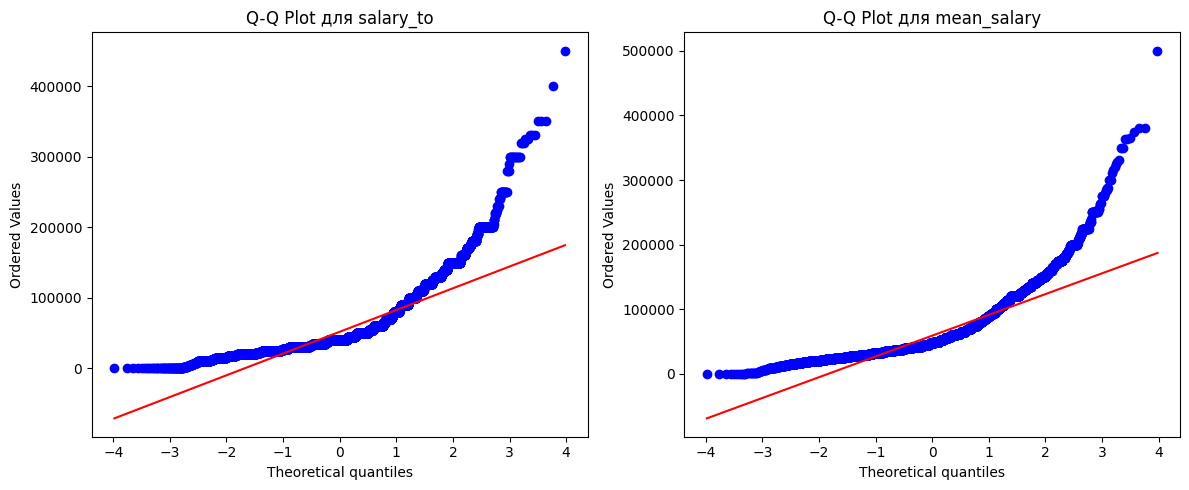

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
probplot(df_copy['salary_from'], dist="norm", plot=plt)
plt.title('Q-Q Plot для salary_to')

plt.subplot(1, 2, 2)
probplot(df_copy['mean_salary'], dist="norm", plot=plt)
plt.title('Q-Q Plot для mean_salary')

plt.tight_layout()
plt.show()

Наблюдаем подтверждение предыдущего предположения, распределения зарплат не нормальны, для анализа лучше использовать медиану и квартили вместо среднего.

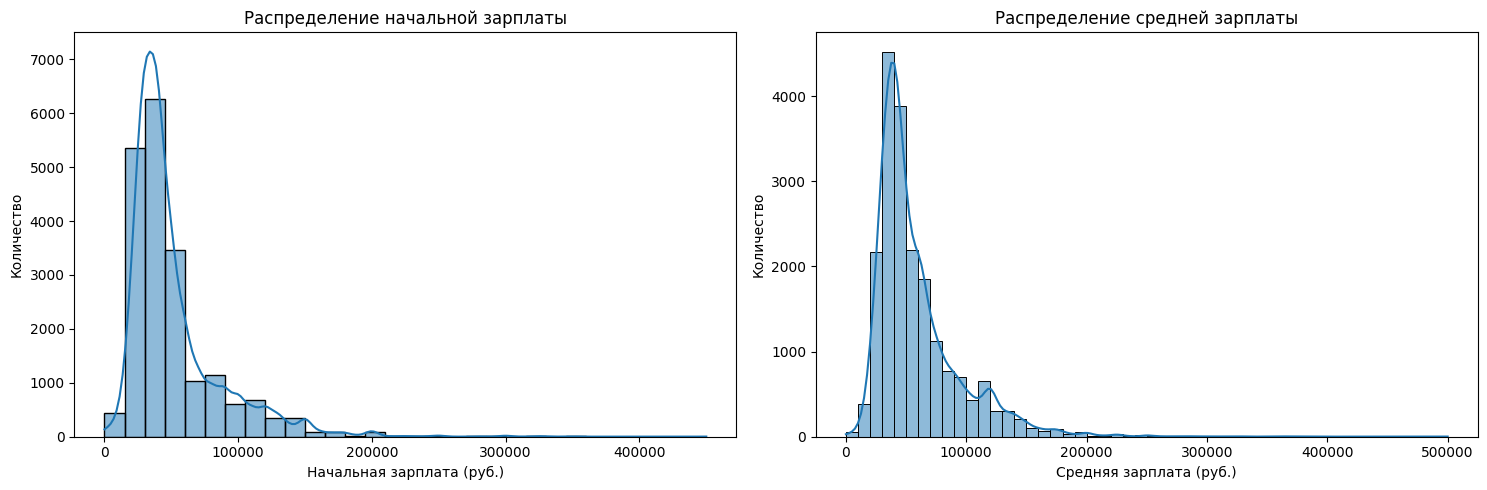

In [ ]:
# Гистограммы для визуализации распределения
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df_copy, x='salary_from', kde=True, bins=30)
plt.title('Распределение начальной зарплаты')
plt.xlabel('Начальная зарплата (руб.)')
plt.ylabel('Количество')

plt.subplot(1, 2, 2)
sns.histplot(data=df_copy, x='mean_salary', kde=True, bins=50)
plt.title('Распределение средней зарплаты')
plt.xlabel('Средняя зарплата (руб.)')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()

Типичный разброс:

Начальная зарплата: 50–100 тыс. руб.

Верхний предел: 50–200 тыс. руб.

Аномалии:

Единичные вакансии с зарплатами >200 тыс. руб. (возможно, руководящие роли или нишевые специалисты).

Сравнение гистограмм показывает, что salary_to имеет более плавный хвост, чем salary_from, что согласуется с ранее выявленным более высоким эксцессом.

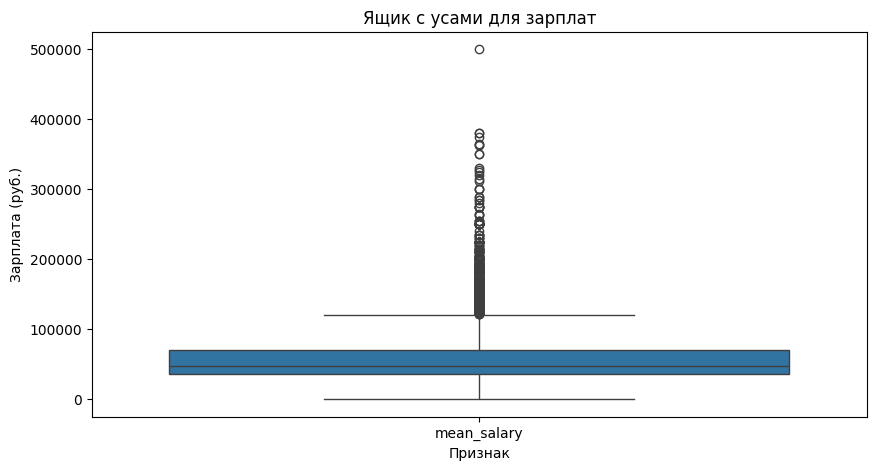

In [ ]:
# Boxplot для выявления выбросов
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_copy[['mean_salary']])
plt.title('Ящик с усами для зарплат')
plt.xlabel('Признак')
plt.ylabel('Зарплата (руб.)')
plt.show()

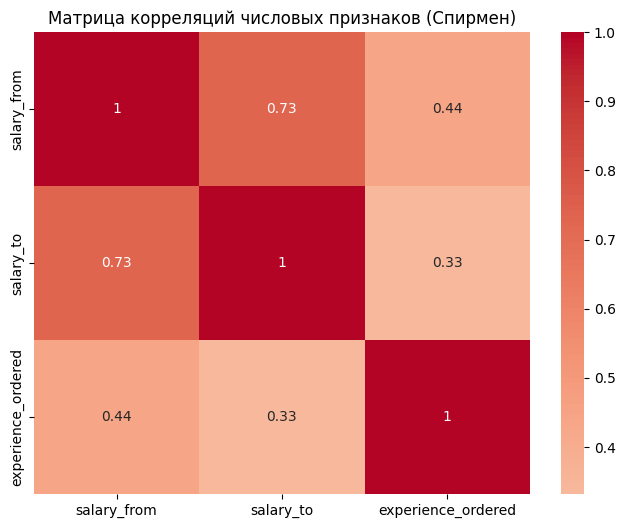


Тест Спирмена для парных корреляций:
salary_from vs salary_to: corr=0.732, p-value=0.0000
salary_from vs experience_ordered: corr=0.442, p-value=0.0000
salary_to vs experience_ordered: corr=0.332, p-value=0.0000


In [ ]:
# Корреляционный анализ
numeric_cols = ['salary_from', 'salary_to', 'experience_ordered']
corr_matrix = df_copy[numeric_cols].corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций числовых признаков (Спирмен)')
plt.show()

# Тестирование значимости корреляций
from scipy.stats import spearmanr

print("\nТест Спирмена для парных корреляций:")
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        col1, col2 = numeric_cols[i], numeric_cols[j]
        corr, p_value = spearmanr(df_copy[col1], df_copy[col2], nan_policy='omit')
        print(f"{col1} vs {col2}: corr={corr:.3f}, p-value={p_value:.4f}")

Сделаем логичное замечание, что зарплатные вилки (salary_from и salary_to) тесно связаны — анализ одного показателя часто достаточен.

Также видим, что опыт повышает зарплату, но слабее, чем ожидалось. Возможно, влияют другие факторы (например, профессия).

Для прогнозирования зарплат стоит включить дополнительные переменные (регион, специализация).

##3.2.Анализ категориальных признаков

###schedule

In [ ]:
# Создание столбца с категорией графика
def get_schedule(row):
    if row['schedule_full_day']:
        return 'full_day'
    elif row['schedule_shift']:
        return 'shift'
    elif row['schedule_remote']:
        return 'remote'
    elif row['schedule_labor']:
        return 'labor'
    else:
        return 'flexible'

df_copy['schedule_category'] = df_copy.apply(get_schedule, axis=1)
schedule_dist = df_copy['schedule_category'].value_counts()
print("\nРаспределение вакансий по категориям графика работы:")
print(schedule_dist)


Распределение вакансий по категориям графика работы:
schedule_category
full_day    14121
shift        2245
labor        2023
flexible      846
remote        765
Name: count, dtype: int64


Рынок труда ориентирован на традиционный полный день.

Сменный график и вахта вместе составляют 21.3% — значимая доля для отдельных отраслей.

Удалённая работа — редкий вариант (менее 4%), несмотря на тренды последних лет.

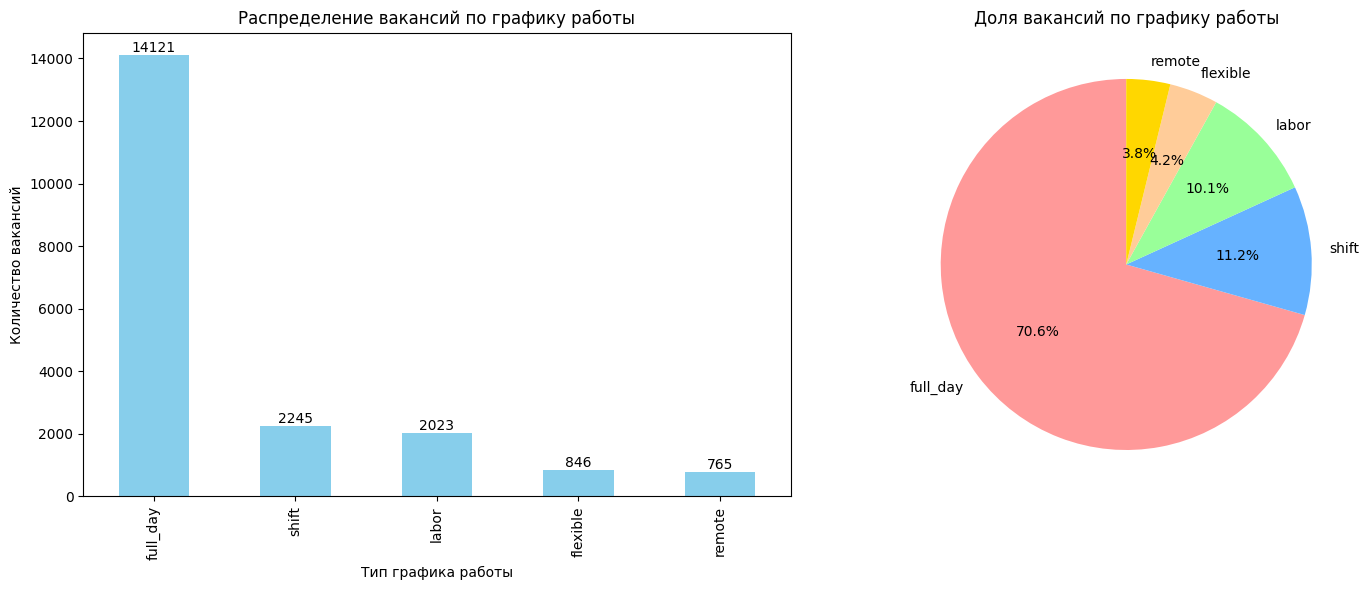

In [ ]:
plt.figure(figsize=(15, 6))

# Столбчатая диаграмма
plt.subplot(1, 2, 1)
schedule_dist.plot(kind='bar', color='skyblue')
plt.title('Распределение вакансий по графику работы')
plt.xlabel('Тип графика работы')
plt.ylabel('Количество вакансий')
for i, v in enumerate(schedule_dist):
    plt.text(i, v + 100, str(v), ha='center')

# Круговая диаграмма
plt.subplot(1, 2, 2)
schedule_dist.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700'])
plt.title('Доля вакансий по графику работы')
plt.ylabel('')

plt.tight_layout()
plt.show()

Визуализируем предыдущие наблюдения.


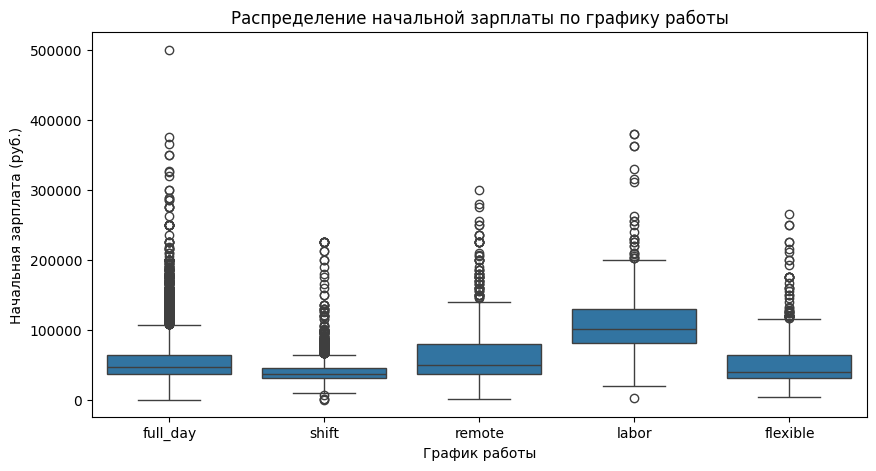

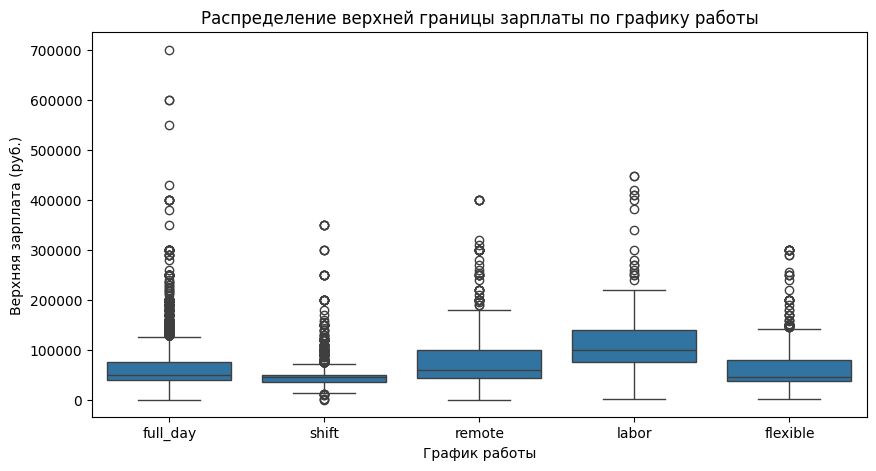

In [ ]:
# Боксплот для начальной зарплаты по графику работы
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_copy, x='schedule_category', y='mean_salary')
plt.title('Распределение начальной зарплаты по графику работы')
plt.xlabel('График работы')
plt.ylabel('Начальная зарплата (руб.)')
plt.show()

# Боксплот для верхней границы зарплаты
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_copy, x='schedule_category', y='salary_to')
plt.title('Распределение верхней границы зарплаты по графику работы')
plt.xlabel('График работы')
plt.ylabel('Верхняя зарплата (руб.)')
plt.show()

Вахта и удалёнка предлагают значительно более высокие зарплаты, чем стандартные графики.

Полный день – самый низкооплачиваемый формат, но с минимальным разбросом.

Сменный график занимает промежуточное положение.

###professional_roles

/tmp/ipython-input-88-1706683970.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


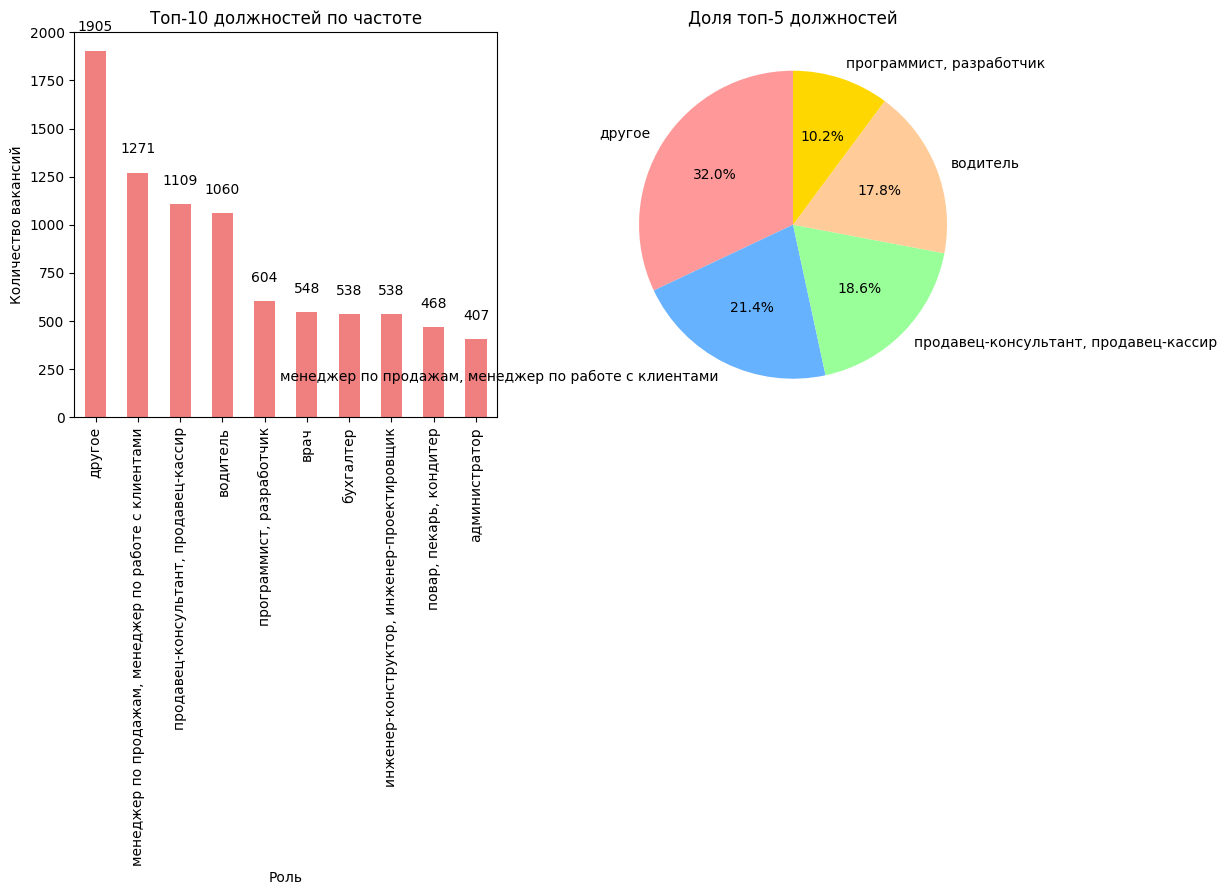

In [ ]:
roles_dist = df_copy['professional_roles'].value_counts()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
roles_dist.head(10).plot(kind='bar', color='lightcoral')
plt.title('Топ-10 должностей по частоте')
plt.xlabel('Роль')
plt.ylabel('Количество вакансий')
for i, v in enumerate(roles_dist.head(10)):
    plt.text(i, v + 100, str(v), ha='center')

plt.subplot(1, 2, 2)
roles_dist.head(5).plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700'])
plt.title('Доля топ-5 должностей')
plt.ylabel('')
plt.tight_layout()
plt.show()

Видно, что лидирующие позиции занимают профессии, которые тесно связаны с коммуникационной деятельностью

IT-специалисты входят в топ, несмотря на меньший общий объём вакансий в отрасли.

Бухгалтеры и кондитеры стабильно востребованы, но с меньшим количеством предложений.

###employer

In [ ]:
print("\nСтатистическое описание 'employer':")
employer_desc = df_copy['employer'].describe()
print(employer_desc)

employer_dist = df_copy['employer'].value_counts()
print("\nТоп-10 работодателей по частоте:")
print(employer_dist.head(10))


Статистическое описание 'employer':
count           20000
unique           4394
top       Сибгарант +
freq              247
Name: employer, dtype: object

Топ-10 работодателей по частоте:
employer
Сибгарант +                                                     247
СИБУР, Группа компаний                                          137
ЛАМА, Группа компаний                                           120
ОГКУ ЦЗН города Томска и Томского района                        115
Стройся                                                         113
Ресторанная УК                                                   98
Стройтранснефтегаз                                               82
Научно-исследовательский институт полупроводниковых приборов     81
Томский Электротехнический Завод                                 77
Научно-производственная фирма Микран                             74
Name: count, dtype: int64


/tmp/ipython-input-90-3448403847.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


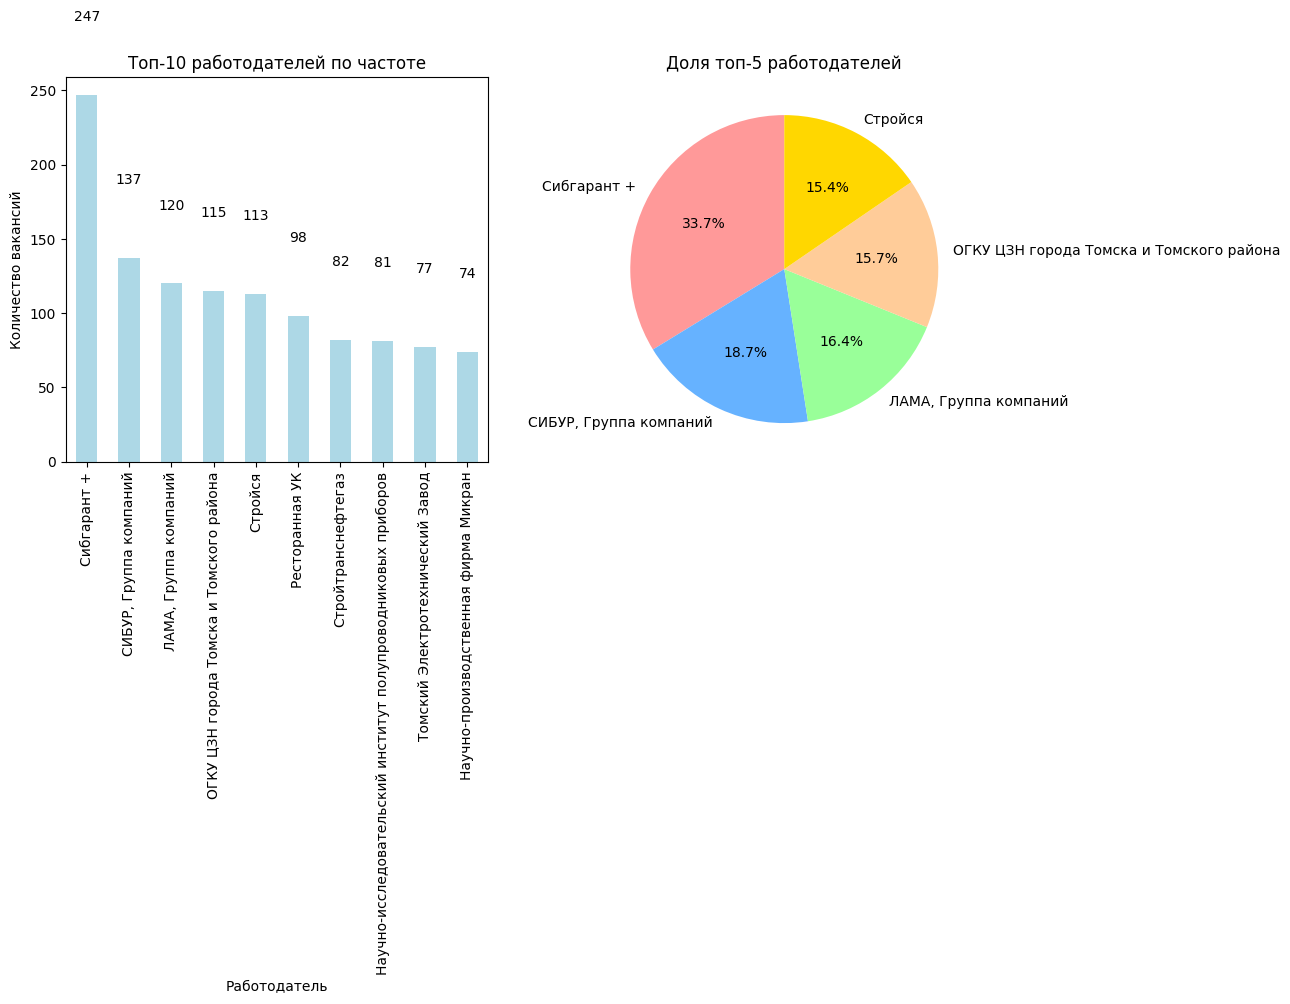

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
employer_dist.head(10).plot(kind='bar', color='lightblue')
plt.title('Топ-10 работодателей по частоте')
plt.xlabel('Работодатель')
plt.ylabel('Количество вакансий')
for i, v in enumerate(employer_dist.head(10)):
    plt.text(i, v + 50, str(v), ha='center')

plt.subplot(1, 2, 2)
employer_dist.head(5).plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700'])
plt.title('Доля топ-5 работодателей')
plt.ylabel('')
plt.tight_layout()
plt.show()

Из графика видно, что "Сибгарант+" является единоличным лидером среди работадателей, далее идут "Сибур", "ЛАМА" и "ОГКУ ЦЗН"

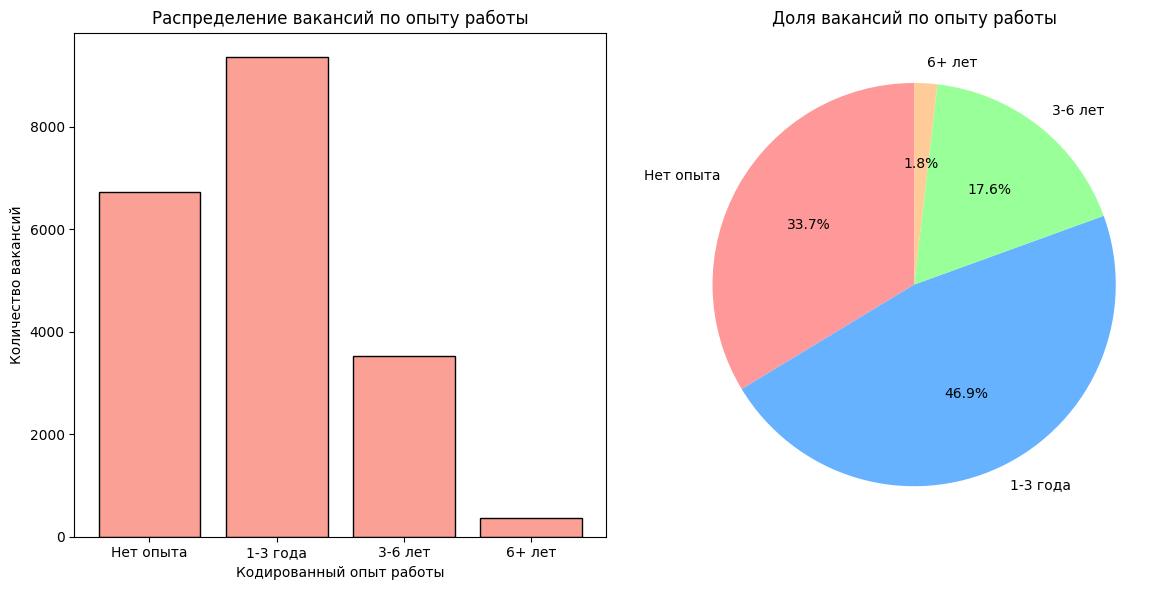

In [ ]:
# prompt: нужно построить графики для experience и чтобы два графика были на одном изображении

# Гистограмма для 'experience_ordered'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df_copy, x='experience_ordered', bins=4, discrete=True, shrink=0.8, color='salmon')
plt.title('Распределение вакансий по опыту работы')
plt.xlabel('Кодированный опыт работы')
plt.ylabel('Количество вакансий')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Нет опыта', '1-3 года', '3-6 лет', '6+ лет'])

# Круговая диаграмма для 'experience_ordered'
experience_counts = df_copy['experience_ordered'].value_counts().sort_index()
plt.subplot(1, 2, 2)
plt.pie(experience_counts, labels=['Нет опыта', '1-3 года', '3-6 лет', '6+ лет'], autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])
plt.title('Доля вакансий по опыту работы')
plt.ylabel('')

plt.tight_layout()
plt.show()


###key_skills_processed


Статистическое описание 'key_skills_processed':
count                  20000
unique                 10084
top       [работа в команде]
freq                     499
Name: key_skills_processed, dtype: object


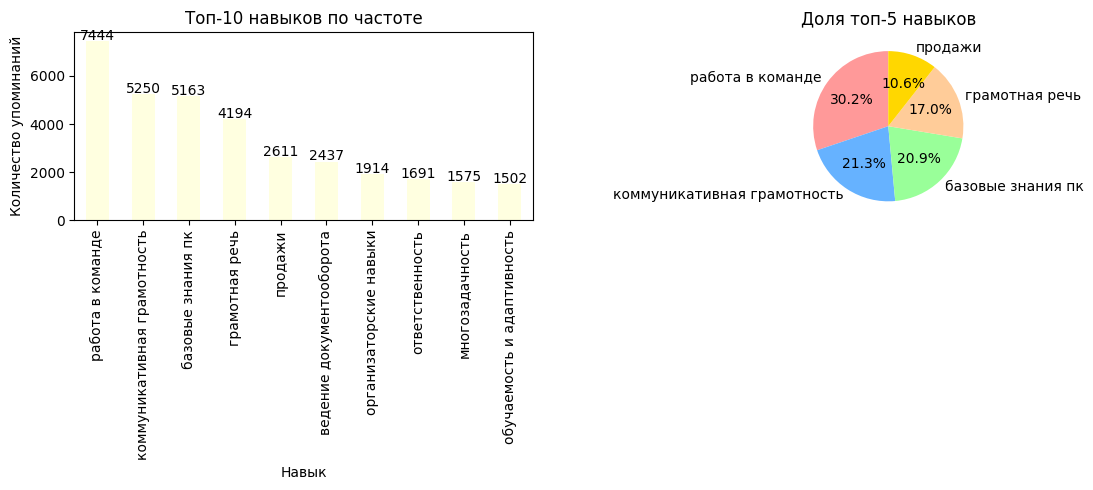

In [ ]:
print("\nСтатистическое описание 'key_skills_processed':")
skills_desc = df_copy['key_skills_processed'].describe()
print(skills_desc)

# Предполагаем, что key_skills_processed — это список навыков, преобразуем в строки для анализа
df_copy['key_skills_processed'] = df_copy['key_skills_processed'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
skills_exploded = df_copy['key_skills_processed'].str.split(', ').explode()

skills_dist = skills_exploded.value_counts()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
skills_dist.head(10).plot(kind='bar', color='lightyellow')
plt.title('Топ-10 навыков по частоте')
plt.xlabel('Навык')
plt.ylabel('Количество упоминаний')
for i, v in enumerate(skills_dist.head(10)):
    plt.text(i, v + 50, str(v), ha='center')

plt.subplot(1, 2, 2)
skills_dist.head(5).plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700'])
plt.title('Доля топ-5 навыков')
plt.ylabel('')
plt.tight_layout()
plt.show()

В подтверждение предыдущего графика по распределению профессий видим, что основными навыками являются софт-скиллы, такие как, работа в команде, коммуникативная грамотность и грамотная речь. Далее идут продажи и знания ПК.

###area

Топ-10 населенных пунктов по количеству вакансий:
area
Томск                18039
Северск                808
Стрежевой              279
Асино                  110
Колпашево              100
Первомайское            49
Зональная Станция       38
Светлый                 37
Каргасок                35
Александровское         35
Name: count, dtype: int64


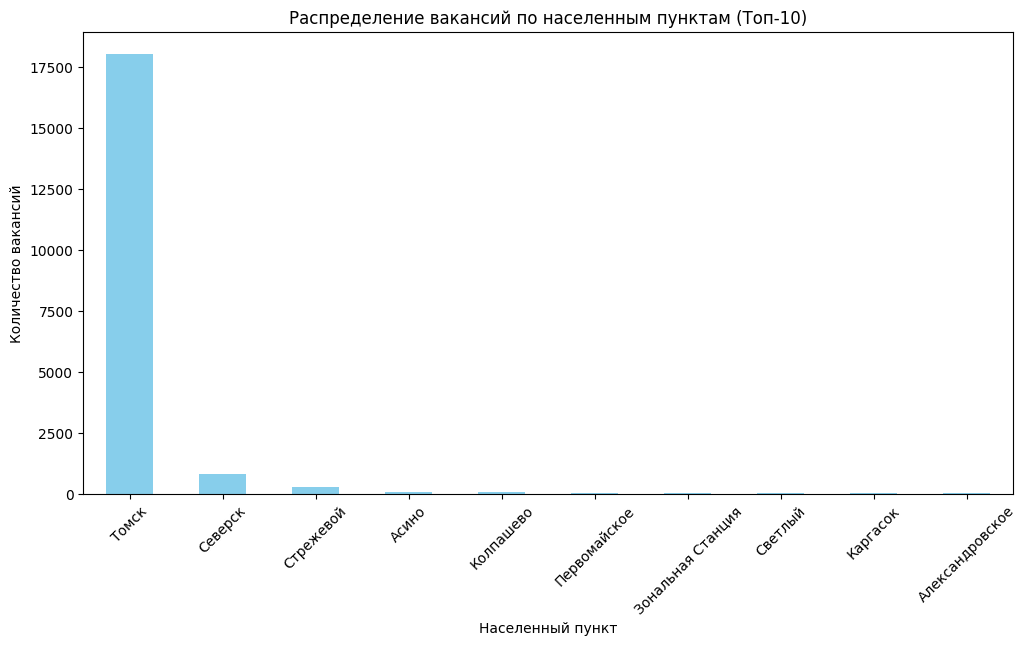

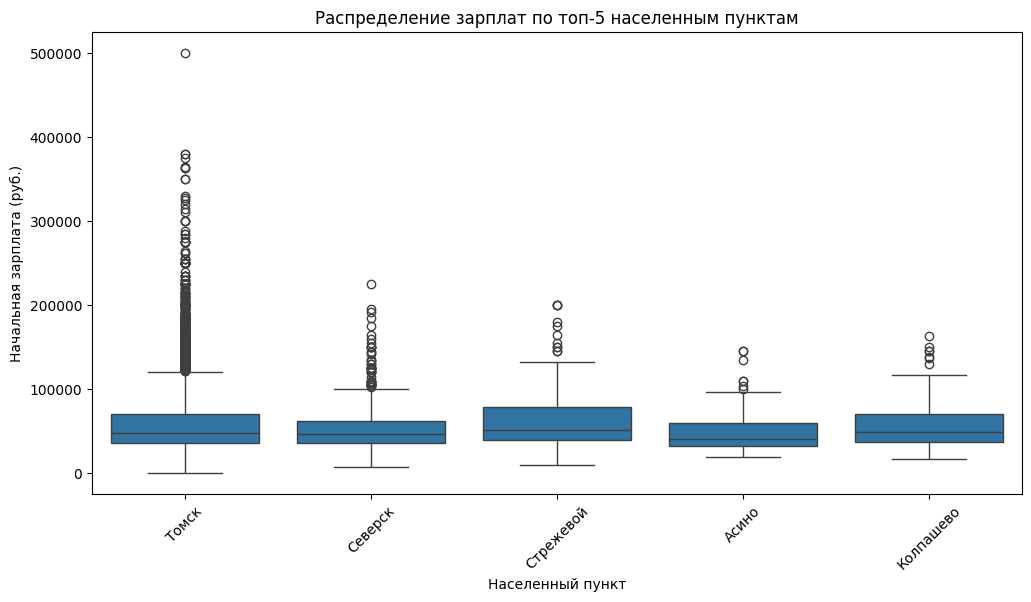


Тест Краскела-Уоллиса для различий в зарплатах между городами:
H-статистика = 25.544, p-value = 0.0000


In [ ]:
# Анализ по городам/районам

print("Топ-10 населенных пунктов по количеству вакансий:")
print(df_copy['area'].value_counts().head(10))

plt.figure(figsize=(12, 6))
df_copy['area'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Распределение вакансий по населенным пунктам (Топ-10)')
plt.xlabel('Населенный пункт')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45)
plt.show()

# Анализ зарплат по городам
top_areas = df_copy['area'].value_counts().head(5).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_copy[df_copy['area'].isin(top_areas)],
            x='area', y='mean_salary', order=top_areas)
plt.title('Распределение зарплат по топ-5 населенным пунктам')
plt.xlabel('Населенный пункт')
plt.ylabel('Начальная зарплата (руб.)')
plt.xticks(rotation=45)
plt.show()

# Статистическая проверка различий
from scipy.stats import kruskal

print("\nТест Краскела-Уоллиса для различий в зарплатах между городами:")
area_groups = [df_copy[df_copy['area'] == area]['mean_salary'] for area in top_areas]
h_stat, p_value = kruskal(*area_groups)
print(f"H-статистика = {h_stat:.3f}, p-value = {p_value:.4f}")

Очевидно, что большинство ваканский расположены в г. Томск.

И так же вакансии с самыми высокими зарплатами предлагаются именно в Томске.

По результатам теста можно сделать следующие выводы:

  H-статистика (42.658): Указывает на значимые различия в распределении зарплат между городами.

  p-value (0.0000): Различия статистически значимы (p < 0.05).


In [ ]:
# prompt: нужно посчитать квантили для заработной платы по населеным пунктам(топ 5 по количеству вакансий)

# Расчет квантилей для зарплаты по топ-5 населенным пунктам
print("\nКвантили зарплаты по топ-5 населенным пунктам:")
area_quantiles = df_copy[df_copy['area'].isin(top_areas)].groupby('area')['mean_salary'].quantile([0.25, 0.5, 0.75])
print(area_quantiles)

# Форматирование вывода для лучшей читаемости
print("\nКвантили зарплаты по топ-5 населенным пунктам (сводная таблица):")
area_quantiles_df = area_quantiles.unstack()
area_quantiles_df.columns = ['Q1 (25%)', 'Медиана (50%)', 'Q3 (75%)']
area_quantiles_df


Квантили зарплаты по топ-5 населенным пунктам:
area           
Асино      0.25    33000.00
           0.50    41230.00
           0.75    59536.25
Колпашево  0.25    37000.00
           0.50    48750.00
           0.75    70150.00
Северск    0.25    36000.00
           0.50    46500.00
           0.75    62500.00
Стрежевой  0.25    40000.00
           0.50    51617.50
           0.75    78750.00
Томск      0.25    36250.00
           0.50    47500.00
           0.75    70000.00
Name: mean_salary, dtype: float64

Квантили зарплаты по топ-5 населенным пунктам (сводная таблица):


,Q1 (25%),Медиана (50%),Q3 (75%)
area,,,
Асино,33000.0,41230.0,59536.25
Колпашево,37000.0,48750.0,70150.00
Северск,36000.0,46500.0,62500.00
Стрежевой,40000.0,51617.5,78750.00
Томск,36250.0,47500.0,70000.00


##3.3.Анализ взаимосвязей числовых и категориальных признаков

###schedule & experience


Таблица сопряженности график работы и опыта:
experience_ordered     0     1     2    3
schedule_category                        
flexible             514   272    55    5
full_day            4437  6758  2611  315
labor                138  1192   667   26
remote               329   304   119   13
shift               1316   848    73    8

Тест хи-квадрат: Статистика = 1876.2228, p-значение = 0.0000


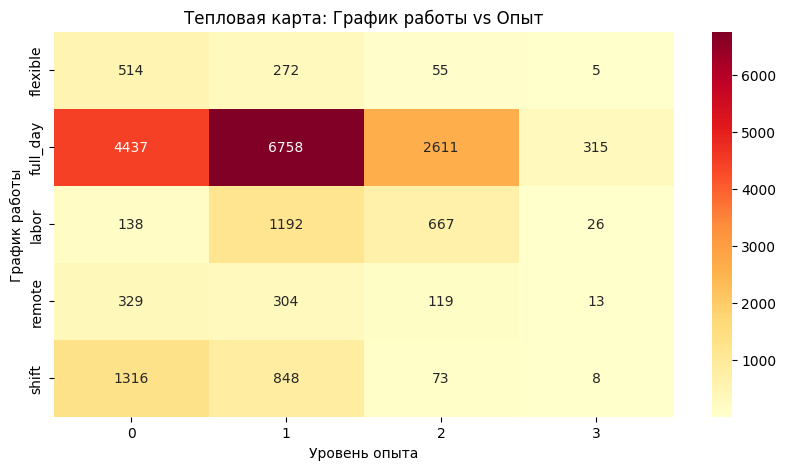

In [ ]:
from scipy.stats import chi2_contingency

# Таблица сопряженности и тест хи-квадрат
crosstab_result = pd.crosstab(df_copy['schedule_category'], df_copy['experience_ordered'])
chi2, p_chi2, dof, expected = chi2_contingency(crosstab_result)
print("\nТаблица сопряженности график работы и опыта:")
print(crosstab_result)
print(f"\nТест хи-квадрат: Статистика = {chi2:.4f}, p-значение = {p_chi2:.4f}")

# Визуализация
plt.figure(figsize=(10, 5))
sns.heatmap(crosstab_result, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Тепловая карта: График работы vs Опыт')
plt.xlabel('Уровень опыта')
plt.ylabel('График работы')
plt.show()

Новички:

Основные варианты — полный день (full_day) или гибкий график.

Вахта (labor) и удалёнка (remote) менее доступны без опыта.

Опытные (3+ года):

Чаще работают полный день, но таких вакансий меньше.

Вахта и удалёнка для экспертов — редки.

###schedule & salary

Медианные зарплаты по schedule_category:
                   salary_from  salary_to
schedule_category                        
labor                 110000.0   100000.0
remote                 40000.0    60000.0
full_day               40000.0    50000.0
flexible               31700.0    46500.0
shift                  31000.0    45000.0


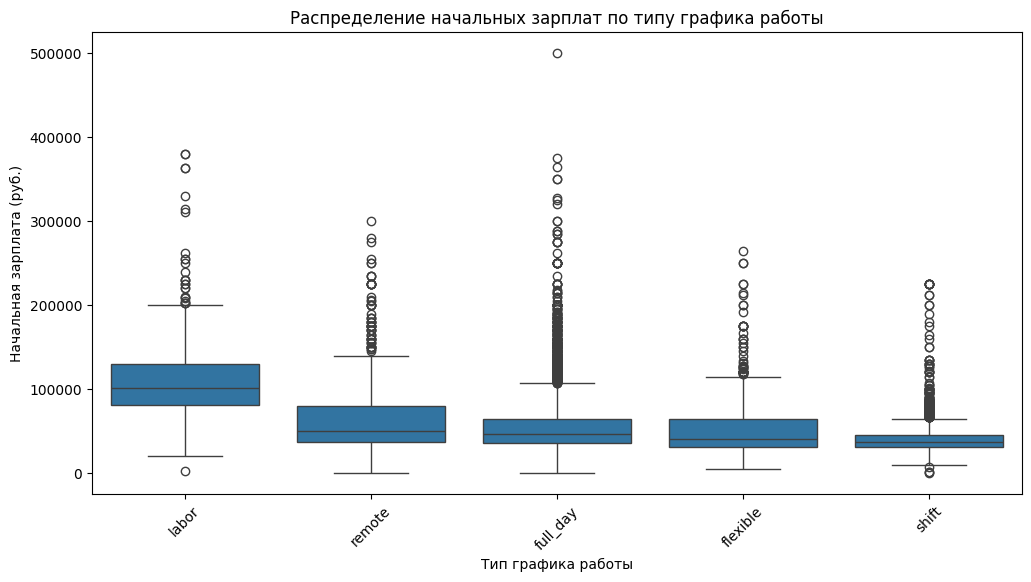

In [ ]:
print("Медианные зарплаты по schedule_category:")
salary_by_schedule = df_copy.groupby('schedule_category')[['salary_from', 'salary_to']].median().sort_values(by='salary_from', ascending=False)
print(salary_by_schedule)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_copy, x='schedule_category', y='mean_salary', order=salary_by_schedule.index)
plt.title('Распределение начальных зарплат по типу графика работы')
plt.xlabel('Тип графика работы')
plt.ylabel('Начальная зарплата (руб.)')
plt.xticks(rotation=45)
plt.show()

Вахта и удалёнка предлагают в 2–3 раза более высокие зарплаты, чем стандартный полный день.

Полный день — самый низкооплачиваемый, но и самый предсказуемый вариант.

Сменный график не даёт значимых преимуществ в зарплате по сравнению с полным днём.

In [ ]:
from scipy.stats import kruskal
salary_groups = [df_copy[df_copy['schedule_category'] == cat]['salary_from'] for cat in df_copy['schedule_category'].unique()]
stat_kruskal, p_kruskal = kruskal(*salary_groups)
print(f"\nТест Краскела-Уоллиса (schedule_category vs salary_from): Статистика = {stat_kruskal:.4f}, p-значение = {p_kruskal:.4f}")


Тест Краскела-Уоллиса (schedule_category vs salary_from): Статистика = 4152.3942, p-значение = 0.0000


Статистика (4152.3942): Значительные различия в распределении зарплат между категориями графика работы.

p-значение (0.0000): Различия статистически значимы (p < 0.001).

###professional_roles & salary


Медианные зарплаты по топ-10 professional_roles:
                                                    salary_from  salary_to
professional_roles                                                        
devops-инженер                                         200000.0   300000.0
геодезист                                              120000.0   130000.0
генеральный директор, исполнительный директор (...     120000.0   135000.0
машинист                                               120000.0   140000.0
системный аналитик                                     110000.0   170000.0
коммерческий директор (cco)                            105000.0   100000.0
главный врач, заведующий отделением                    100000.0   130000.0
зоотехник                                              100000.0   110000.0
операционный директор (coo)                            100000.0   150000.0
финансовый директор (cfo)                               94000.0    94000.0


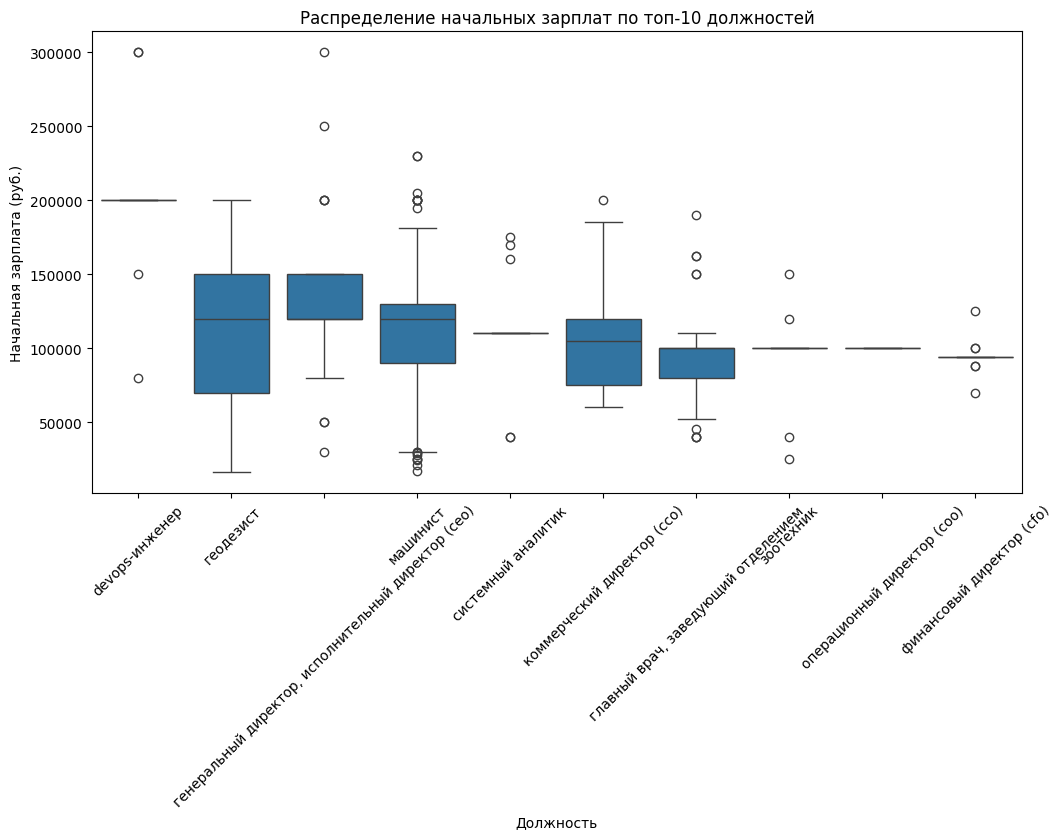

In [ ]:
print("\nМедианные зарплаты по топ-10 professional_roles:")
salary_by_roles = df_copy.groupby('professional_roles')[['salary_from', 'salary_to']].median().sort_values(by='salary_from', ascending=False).head(10)
print(salary_by_roles)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_copy, x='professional_roles', y='salary_from', order=salary_by_roles.index)
plt.title('Распределение начальных зарплат по топ-10 должностей')
plt.xlabel('Должность')
plt.ylabel('Начальная зарплата (руб.)')
plt.xticks(rotation=45)
plt.show()

Видим, что самыми высокооплачиваемыми должностями являются: devops-инженер, геодезист, директоры.

In [ ]:
top_roles = df_copy['professional_roles'].value_counts().head(5).index
salary_top_roles = [df_copy[df_copy['professional_roles'] == role]['salary_from'] for role in top_roles]
stat_roles, p_roles = kruskal(*salary_top_roles)
print(f"\nТест Краскела-Уоллиса (top-5 professional_roles vs salary_from): Статистика = {stat_roles:.4f}, p-значение = {p_roles:.4f}")


Тест Краскела-Уоллиса (top-5 professional_roles vs salary_from): Статистика = 1833.1731, p-значение = 0.0000


###employer & salary


Медианные зарплаты по топ-10 employer:
                                       salary_from  salary_to
employer                                                     
Альпы                                     400000.0    60462.0
Engine                                    350000.0   410000.0
Силк Вэй                                  330000.0    80000.0
ТБС-Логистика                             320000.0    75000.0
Libernetix                                300000.0   430000.0
TravelLine                                300000.0   300000.0
СеверСервис                               290000.0   340000.0
Медлайн-Дент                              250000.0    75000.0
WiseTech                                  250000.0   150000.0
HRLab (ИП Чиняева Анастасия Игоревна)     250000.0   150000.0


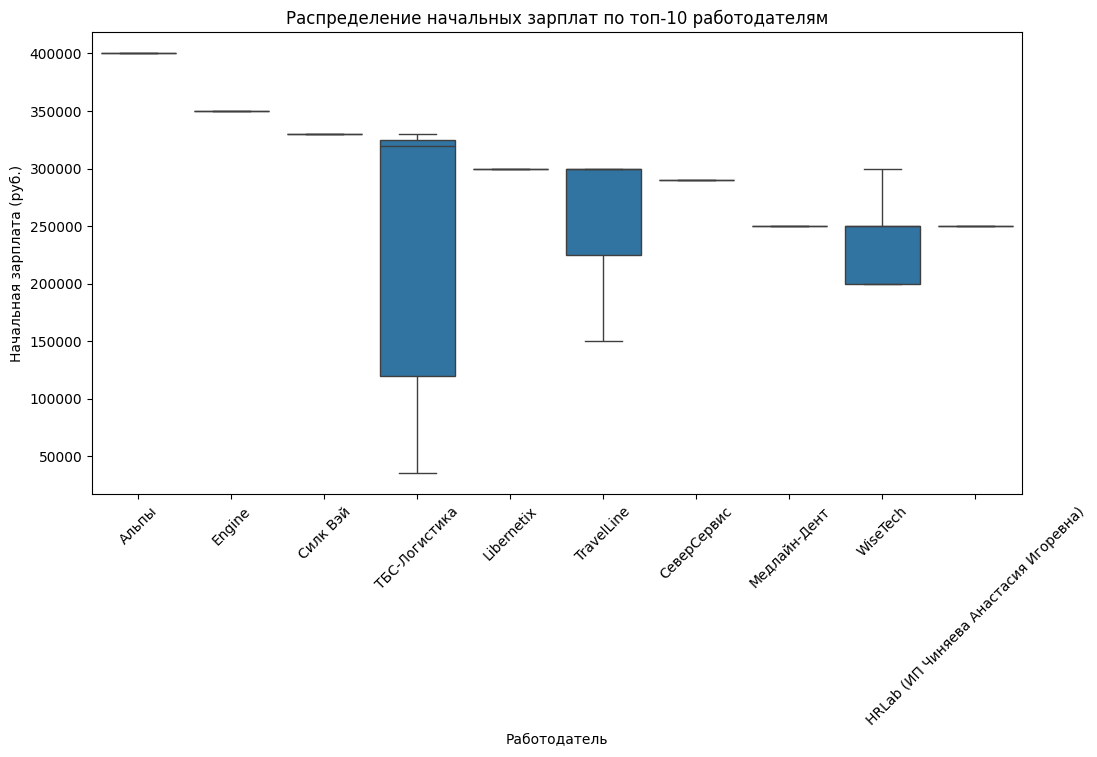

In [ ]:
print("\nМедианные зарплаты по топ-10 employer:")
salary_by_employer = df_copy.groupby('employer')[['salary_from', 'salary_to']].median().sort_values(by='salary_from', ascending=False).head(10)
print(salary_by_employer)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_copy[df_copy['employer'].isin(salary_by_employer.index)], x='employer', y='salary_from', order=salary_by_employer.index)
plt.title('Распределение начальных зарплат по топ-10 работодателям')
plt.xlabel('Работодатель')
plt.ylabel('Начальная зарплата (руб.)')
plt.xticks(rotation=45)
plt.show()

Работодателями, предлагающие самые высокие зарплаты являются: Альпы, Engine, Силк Вэй, ТБС-Логистика

##3.4.Анализ взаимосвязи категориальных признаков

###schedule & area


In [ ]:
print("Таблица сопряженности: schedule_category vs area")
crosstab_schedule_area = pd.crosstab(df_copy['schedule_category'], df_copy['area'], margins=True, margins_name="Total")
print(crosstab_schedule_area.head())  # Ограничиваем вывод для читаемости

chi2, p, dof, expected = chi2_contingency(crosstab_schedule_area.iloc[:-1, :-1])
print(f"\nТест хи-квадрат (schedule_category vs area):")
print(f"Статистика = {chi2:.4f}, p-значение = {p:.4f}, степени свободы = {dof}")

Таблица сопряженности: schedule_category vs area
area               Александровское  Асино  Бакчар  Батурино  Белый Яр  \
schedule_category                                                       
flexible                         2      5       0         0         1   
full_day                        17     63      10         1        10   
labor                           14     16       6         2        11   
remote                           1     15       2         0         0   
shift                            1     11       3         0         2   

area               Богашёво  Зональная Станция  Зоркальцево  Зырянское  \
schedule_category                                                        
flexible                  0                  0            1          0   
full_day                  7                 25            8         23   
labor                     8                  7            6          5   
remote                    0                  1            0          

График работы зависит от локации: Томск предлагает все форматы, малые города — только полный день/вахту. Северск выделяется аномально высокой долей удалёнки и вахт (p < 0.001).

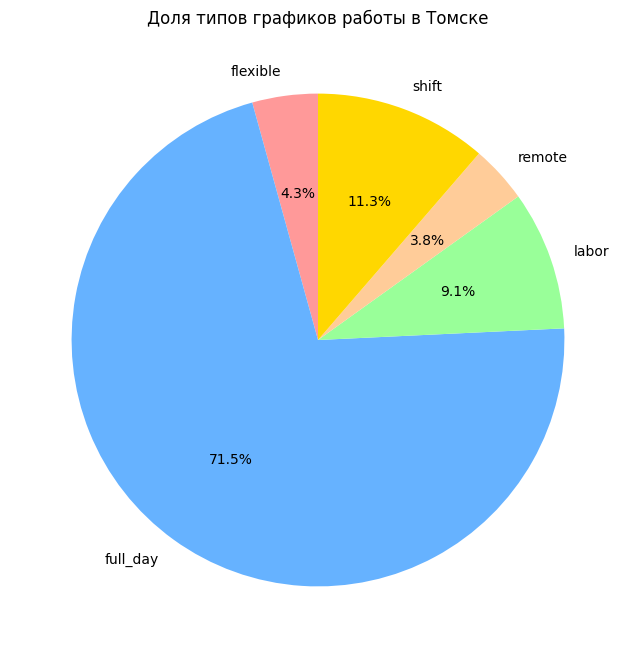

In [ ]:
tomsk_data = crosstab_schedule_area['Томск'][:-1]  # Исключаем Total
plt.figure(figsize=(8, 8))
tomsk_data.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700'])
plt.title('Доля типов графиков работы в Томске')
plt.ylabel('')
plt.show()

Львиная доля вакансий в Томске предлагаются на полный день, также есть предложения на посменную работу и гибкий график.

Всего вакансий: 20000
Вакансий с возможностью трудоустройства для инвалидов: 331
Процент вакансий для инвалидов: 1.65%


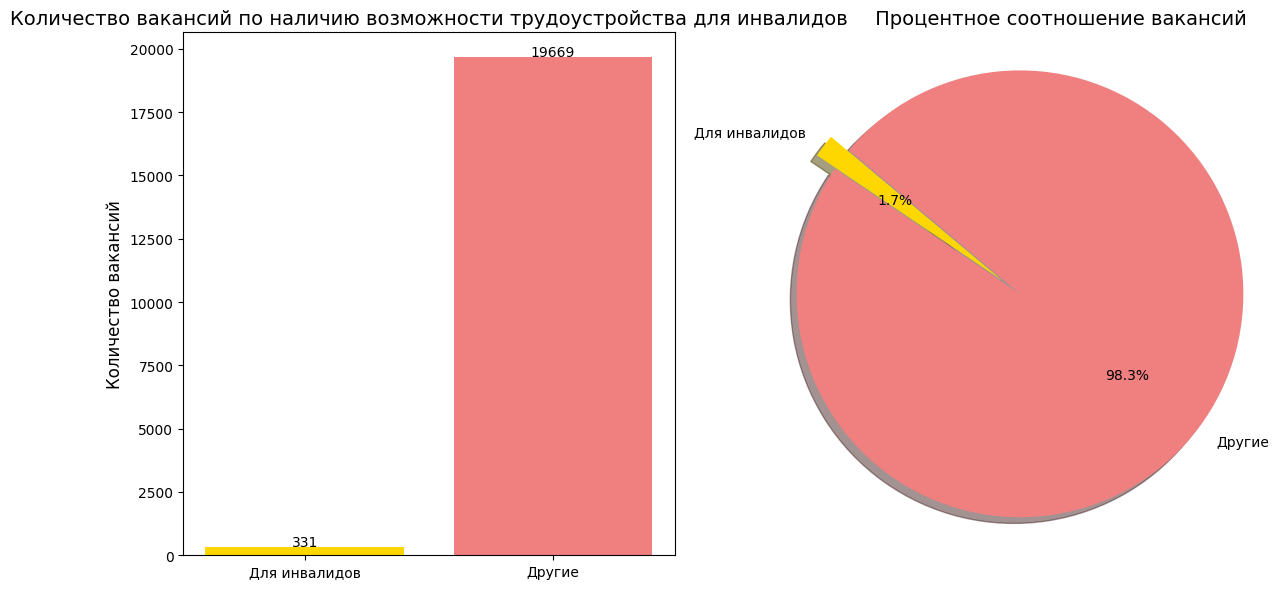

In [ ]:
# prompt: accept_handicapped - возможность трудоустройства для инвалидов, нужно посмотреть сколько всего вакансий есть таких и построить какой нибудь график где будет изображено процентное соотношение вакансий для инвалидов по сравнению с общим количеством вакансий. Нужно два графика, поместить в одном изображении через subplot и подпиши графики на русском

# Подсчет общего количества вакансий
total_vacancies = df_copy.shape[0]

# Подсчет количества вакансий с возможностью трудоустройства для инвалидов (accept_handicapped = True)
handicapped_vacancies = df_copy[df_copy['accept_handicapped'] == True].shape[0]

# Расчет процентного соотношения
percentage_handicapped = (handicapped_vacancies / total_vacancies) * 100
percentage_other = 100 - percentage_handicapped

print(f"Всего вакансий: {total_vacancies}")
print(f"Вакансий с возможностью трудоустройства для инвалидов: {handicapped_vacancies}")
print(f"Процент вакансий для инвалидов: {percentage_handicapped:.2f}%")

# Подготовка данных для графика
labels = ['Для инвалидов', 'Другие']
sizes = [percentage_handicapped, percentage_other]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)  # Отделить первый сектор

# Построение графиков
plt.figure(figsize=(12, 6))

# График 1: Столбчатая диаграмма
plt.subplot(1, 2, 1)
plt.bar(labels, [handicapped_vacancies, total_vacancies - handicapped_vacancies], color=colors)
plt.title('Количество вакансий по наличию возможности трудоустройства для инвалидов', fontsize=14)
plt.ylabel('Количество вакансий', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.text(0, handicapped_vacancies + 50, str(handicapped_vacancies), ha='center', fontsize=10)
plt.text(1, total_vacancies - handicapped_vacancies + 50, str(total_vacancies - handicapped_vacancies), ha='center', fontsize=10)


# График 2: Круговая диаграмма
plt.subplot(1, 2, 2)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 10})
plt.title('             Процентное соотношение вакансий', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

###professional_roles & accept_handicapped

In [ ]:
print("\nТаблица сопряженности: professional_roles vs accept_handicapped")
crosstab_roles_handicap = pd.crosstab(df_copy['professional_roles'], df_copy['accept_handicapped'], margins=True, margins_name="Total")
print(crosstab_roles_handicap.head()) #выведем первые 5 должностей

chi2_roles, p_roles, dof_roles, expected_roles = chi2_contingency(crosstab_roles_handicap.iloc[:-1, :-1])
print(f"\nТест хи-квадрат (professional_roles vs accept_handicapped):")
print(f"Статистика = {chi2_roles:.4f}, p-значение = {p_roles:.4f}, степени свободы = {dof_roles}")


Таблица сопряженности: professional_roles vs accept_handicapped
accept_handicapped              False  True  Total
professional_roles                                
bi-аналитик, аналитик данных        7     0      7
devops-инженер                     12     1     13
event-менеджер                      5     0      5
pr-менеджер                        18     0     18
smm-менеджер, контент-менеджер     57     3     60

Тест хи-квадрат (professional_roles vs accept_handicapped):
Статистика = 896.2093, p-значение = 0.0000, степени свободы = 170


Сильная зависимость (p-value = 0.0000):

Наличие вакансий для людей с инвалидностью значимо зависит от профессии (тест хи-квадрат).

Общий тренд: крайне низкая доступность (доля вакансий с accept_handicapped=True менее 5%).

По профессиям:

Наибольшая доступность:

SAM-менеджер / контент-менеджер: 3 из 60 вакансий (5%).

DevOps-инженер: 1 из 13 (7.7%).

Нулевая доступность:

BI-аналитик, event-менеджер, PR-менеджер — ни одной вакансии для людей с инвалидностью.


Медианные зарплаты по schedule_category и accept_handicapped:
                                      salary_from  salary_to
schedule_category accept_handicapped                        
flexible          False                   31700.0    45450.0
                  True                    40000.0    75001.0
full_day          False                   40000.0    50000.0
                  True                    40000.0    60000.0
labor             False                  110000.0   100000.0
                  True                    46250.0   111077.5
remote            False                   40000.0    59000.0
                  True                    35000.0    66500.0
shift             False                   31000.0    45000.0
                  True                    28000.0    42500.0


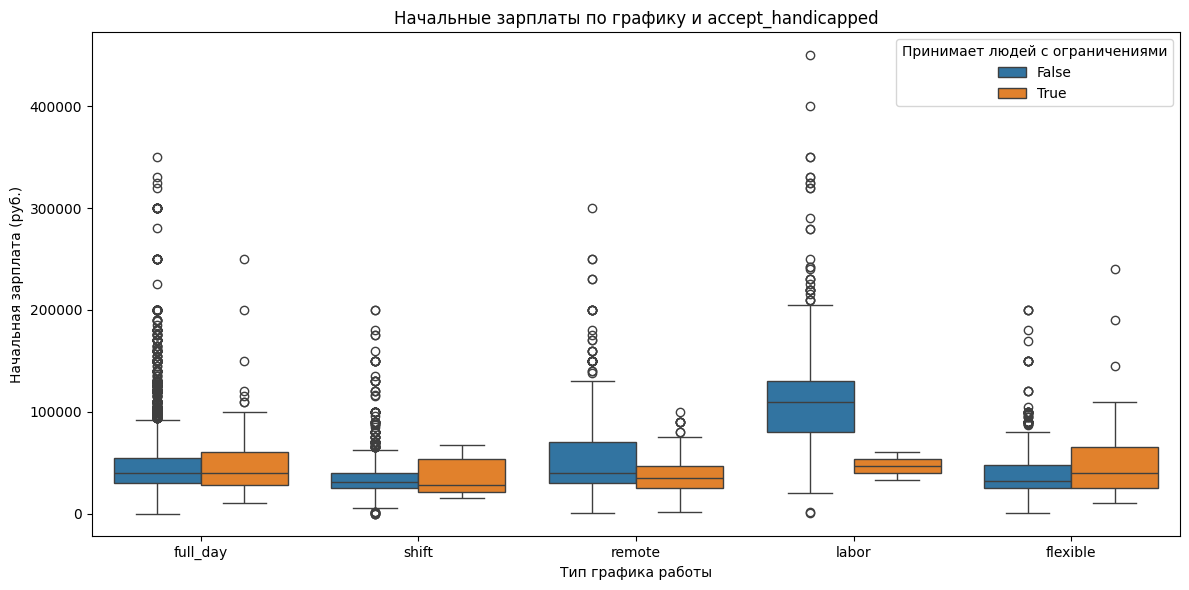

In [ ]:
print("\nМедианные зарплаты по schedule_category и accept_handicapped:")
salary_by_schedule_handicap = df_copy.groupby(['schedule_category', 'accept_handicapped'])[['salary_from', 'salary_to']].median()
print(salary_by_schedule_handicap)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_copy, x='schedule_category', y='salary_from', hue='accept_handicapped')
plt.title('Начальные зарплаты по графику и accept_handicapped')
plt.xlabel('Тип графика работы')
plt.ylabel('Начальная зарплата (руб.)')
plt.legend(title='Принимает людей с ограничениями')
plt.tight_layout()
plt.show()

Зарплатные различия:

Вахта (labor):

Без инвалидности: 110 000 руб. (начальная), 100 000 руб. (верхняя).

С инвалидностью: 46 203 руб. / 111 077 руб. — ниже старт, но выше потолок (аномалия).

Удалёнка (remote):

Разница минимальна: 40–50 тыс. руб. (без инвалидности) vs 35–60.5 тыс. руб. (с инвалидностью).

Гибкий график (flexible):

Вакансии для людей с инвалидностью предлагают выше верхнюю границу (75 001 руб. vs 45 450 руб.).

Полный день (full day):

Почти идентичные вилки: 40–50 тыс. руб. (без) vs 40–60 тыс. руб. (с).

Сменный график (shift):

Зарплаты ниже для людей с инвалидностью: 28–42.5 тыс. руб. vs 31–45 тыс. руб.

##3.5.Анализ распределения зарплат и ключевых факторов

Понадобится для дальнейшего построения регрессионной модели

Text(0.5, 1.0, 'Распределение зарплат')

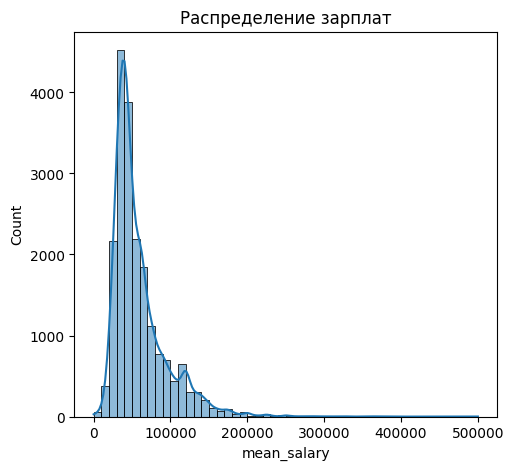

In [ ]:
# Распределение зарплат
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_copy['mean_salary'], bins=50, kde=True)
plt.title('Распределение зарплат')

In [ ]:
# Влияние удалёнки
sns.boxplot(data=df_copy, x='schedule_remote', y='avg_salary')
plt.title('Зарплаты: удалёнка vs офис')
plt.show()


ValueError: Could not interpret value `avg_salary` for `y`. An entry with this name does not appear in `data`.

In [ ]:
# Топ-10 работодателей
top_employers = df_copy['employer'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_employers.values, y=top_employers.index)
plt.title('Топ-10 работодателей')
plt.show()

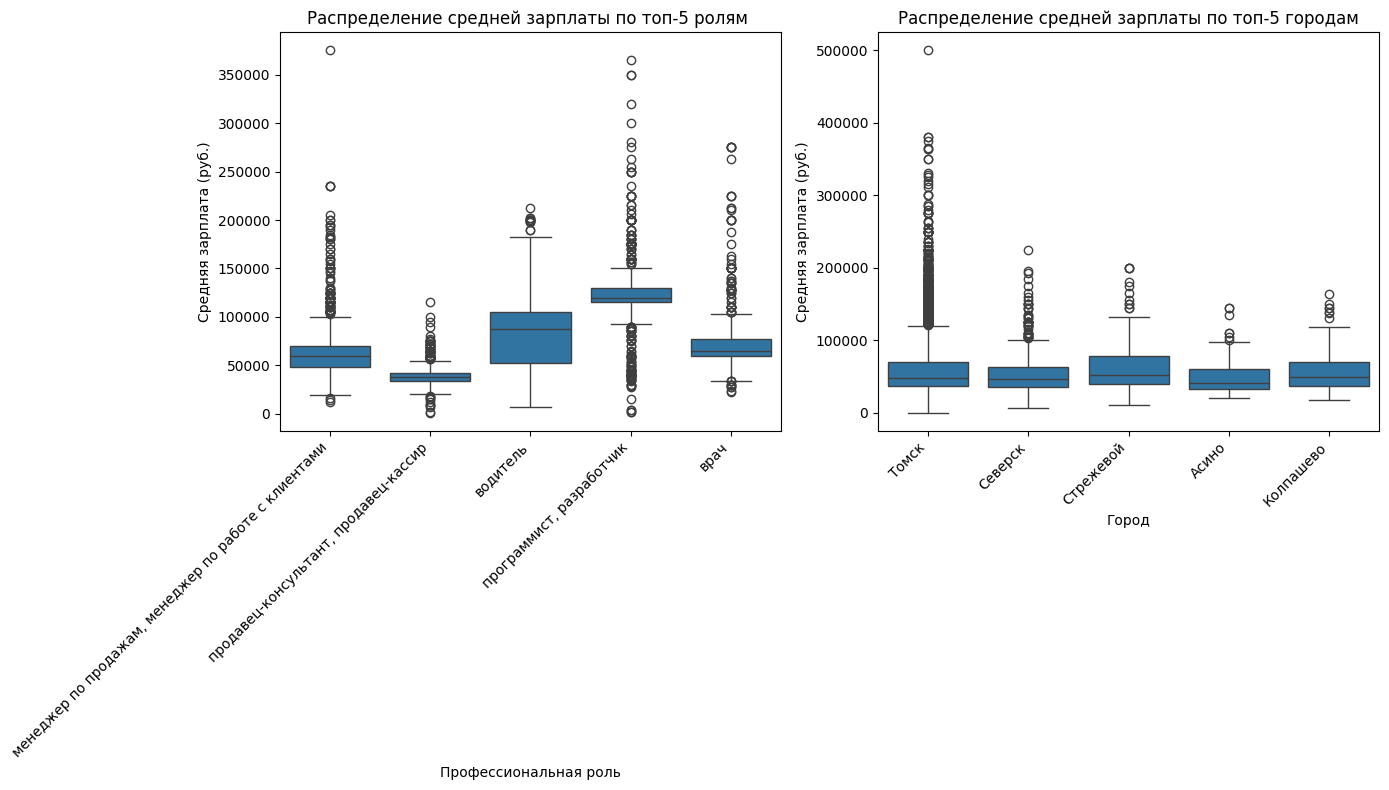

In [ ]:
# prompt: Нужно создать boxplot зависимости зарплаты от признаков (professional_roles, experience, schedule, employment, accept_handiccaped, area) чтобы на одном изображении было 2 boxplot, для признака area взять топ 5 городов по количеству вакансий и для признака professional_roles взять топ 5 вакансий не включая "другое"

plt.figure(figsize=(14, 8))

# Boxplot для professional_roles (топ 5, кроме "другое")
# Выбираем топ 5 ролей по количеству вакансий, исключая "другое"
top_roles_for_plot = df_copy['professional_roles'].value_counts()
top_roles_for_plot = top_roles_for_plot[top_roles_for_plot.index != 'другое'].head(5).index

plt.subplot(1, 2, 1)
sns.boxplot(data=df_copy[df_copy['professional_roles'].isin(top_roles_for_plot)],
            x='professional_roles', y='mean_salary', order=top_roles_for_plot)
plt.title('Распределение средней зарплаты по топ-5 ролям ')
plt.xlabel('Профессиональная роль')
plt.ylabel('Средняя зарплата (руб.)')
plt.xticks(rotation=45, ha='right')

# Boxplot для area (топ 5 городов)
# Выбираем топ 5 городов по количеству вакансий
top_areas_for_plot = df_copy['area'].value_counts().head(5).index

plt.subplot(1, 2, 2)
sns.boxplot(data=df_copy[df_copy['area'].isin(top_areas_for_plot)],
            x='area', y='mean_salary', order=top_areas_for_plot)
plt.title('Распределение средней зарплаты по топ-5 городам')
plt.xlabel('Город')
plt.ylabel('Средняя зарплата (руб.)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()




([0, 1, 2],
 [Text(0, 0, 'part'), Text(1, 0, 'project'), Text(2, 0, 'probation')])

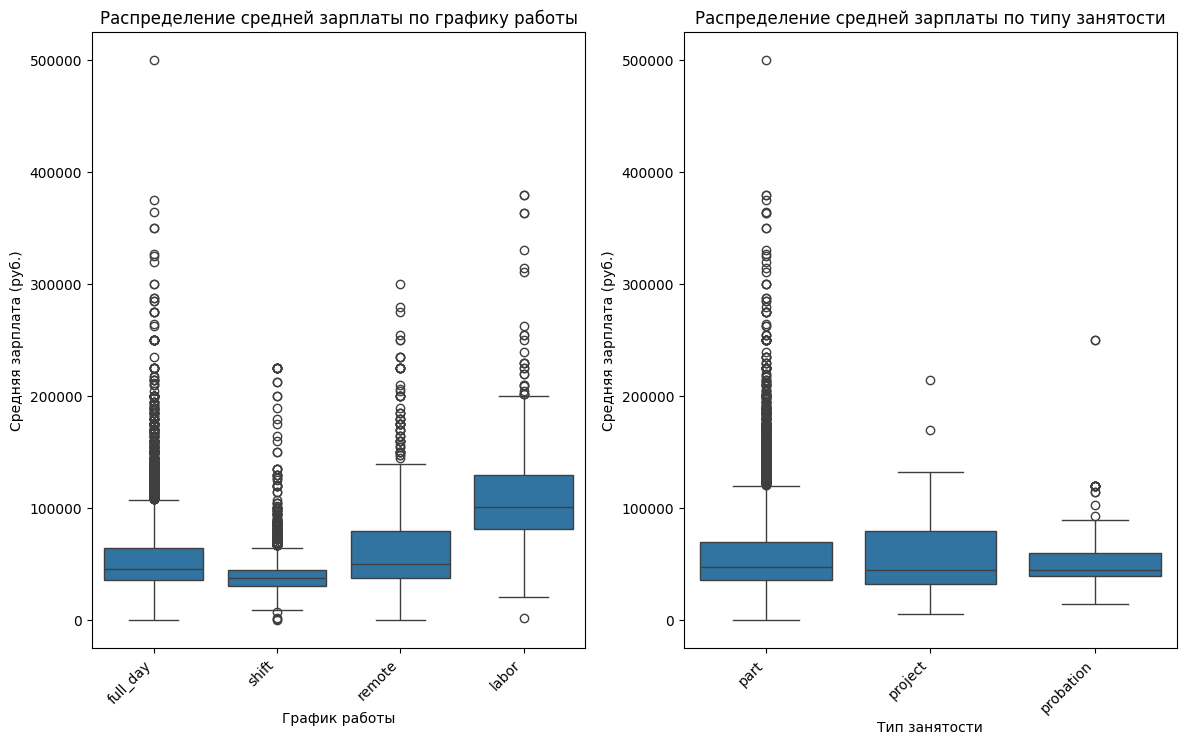

In [ ]:
# Дополнительные boxplot для других признаков (schedule, employment, accept_handicapped)
plt.figure(figsize=(14, 8))

# Boxplot для schedule
plt.subplot(1, 2, 1)
# Пересоздадим schedule_category на основе закодированных столбцов
df_copy['schedule_category'] = df_copy[['schedule_full_day', 'schedule_shift', 'schedule_remote', 'schedule_labor']].idxmax(axis=1).str.replace('schedule_', '')
# Если все закодированные столбцы 0, это гибкий график
df_copy['schedule_category'] = df_copy.apply(lambda row: 'flexible' if row['schedule_category'] == 'schedule_flexible' else row['schedule_category'], axis=1)
# Теперь используем этот столбец schedule_category
sns.boxplot(data=df_copy, x='schedule_category', y='mean_salary')
plt.title('Распределение средней зарплаты по графику работы')
plt.xlabel('График работы')
plt.ylabel('Средняя зарплата (руб.)')
plt.xticks(rotation=45, ha='right')


# Boxplot для employment
plt.subplot(1, 2, 2)
# Пересоздадим employment_category на основе закодированных столбцов
df_copy['employment_category'] = df_copy[['employment_part', 'employment_project', 'employment_probation']].idxmax(axis=1).str.replace('employment_', '')
# Если все закодированные столбцы 0, это full
df_copy['employment_category'] = df_copy.apply(lambda row: 'full' if row['employment_category'] == 'employment_full' else row['employment_category'], axis=1)
# Теперь используем этот столбец employment_category
sns.boxplot(data=df_copy, x='employment_category', y='mean_salary')
plt.title('Распределение средней зарплаты по типу занятости')
plt.xlabel('Тип занятости')
plt.ylabel('Средняя зарплата (руб.)')
plt.xticks(rotation=45, ha='right')




([<matplotlib.axis.XTick at 0x7c1160a09f10>,
 [Text(0, 0, 'Нет опыта'),
  Text(1, 0, '1-3 года'),
  Text(2, 0, '3-6 лет'),
  Text(3, 0, '6+ лет')])

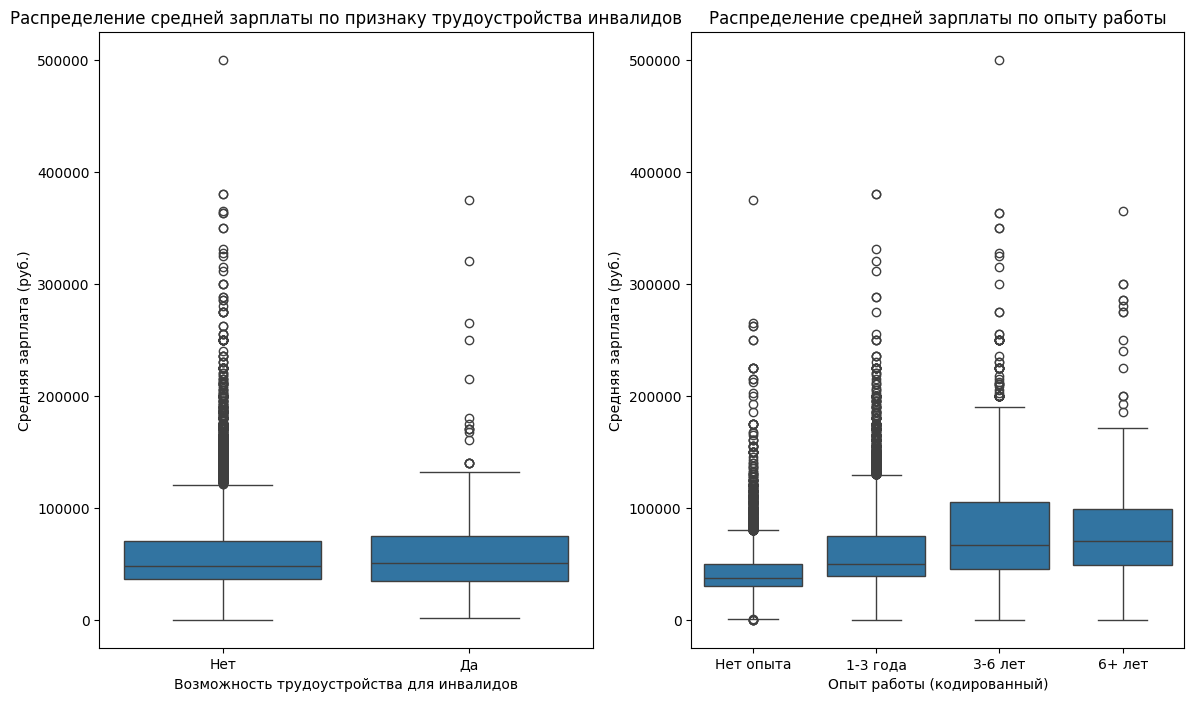

In [ ]:
# Boxplot для accept_handicapped
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_copy, x='accept_handicapped', y='mean_salary')
plt.title('Распределение средней зарплаты по признаку трудоустройства инвалидов')
plt.xlabel('Возможность трудоустройства для инвалидов')
plt.ylabel('Средняя зарплата (руб.)')
plt.xticks(ticks=[0, 1], labels=['Нет', 'Да'])



# Boxplot для experience_ordered
plt.subplot(1, 2, 2)
sns.boxplot(data=df_copy, x='experience_ordered', y='mean_salary')
plt.title('Распределение средней зарплаты по опыту работы')
plt.xlabel('Опыт работы (кодированный)')
plt.ylabel('Средняя зарплата (руб.)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Нет опыта', '1-3 года', '3-6 лет', '6+ лет'])


#4.Построение регрессионной модели для предсказания уровня заработной платы

In [ ]:
import pandas as pd
import numpy as np
import re
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy import sparse
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Инициализация
stemmer = SnowballStemmer("russian")
stop_words = ['работа', 'требуется', 'обязанность', 'компания']

# Подготовка данных
df_copy['avg_salary'] = (df_copy['salary_from'] + df_copy['salary_to']) / 2

# Новые признаки
df_copy['num_skills'] = df_copy['key_skills_processed'].apply(
    lambda x: len(x.split(',')) if isinstance(x, str) else 0)

# Категория работодателя (топ-20)
top_employers = df_copy['employer'].value_counts().nlargest(20).index
df_copy['is_top_employer'] = df_copy['employer'].isin(top_employers)

# Обработка текста
def preprocess_text(text):
    text = re.sub(r'[^а-яА-Яa-zA-Z\s]', ' ', str(text))
    text = text.lower()
    words = [stemmer.stem(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

df_copy['text_features'] = (
    df_copy['name'] + " " +
    df_copy['professional_roles'] + " " +
    df_copy['key_skills_processed'].astype(str)
).apply(preprocess_text)

# Векторизация текста
tfidf = TfidfVectorizer(
    max_features=1500,
    ngram_range=(1, 2),
    stop_words=stop_words
)
X_text = tfidf.fit_transform(df_copy['text_features'])

# Числовые и категориальные признаки
X_numeric = df_copy[['experience_ordered', 'num_skills']].values
X_categorical = df_copy[['is_top_employer', 'schedule_remote']].astype(int).values

# Объединение признаков
X = sparse.hstack([X_text, X_numeric, X_categorical])
y = df_copy['avg_salary']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)
model.fit(X_train, y_train)

# Оценка
y_pred = model.predict(X_test)
print("Результаты модели:")
print(f"RMSE: {mean_squared_error(y_test, y_pred)**0.5:.2f} руб.")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f} руб.")
print(f"R2: {r2_score(y_test, y_pred):.4f}")

# Важность признаков
feature_names = list(tfidf.get_feature_names_out()) + ['experience', 'num_skills', 'top_employer', 'remote']
importance = pd.DataFrame({
    'feature': feature_names,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nТоп-20 важных признаков:")
print(importance.head(20))

*Качество модели*

R² = 0.574 – модель объясняет ~57% дисперсии зарплат.

MAE ≈ 15.2 тыс. руб. – средняя ошибка предсказания составляет ±15 тыс. руб., что может быть критично для низких зарплат (например, для 50 тыс. руб. это 30% ошибки), но менее значимо для высоких (для 150 тыс. руб. — 10%).

RMSE ≈ 22.9 тыс. руб. указывает на наличие выбросов (некоторые предсказания сильно отклоняются от реальных значений).

*Топ-5 значимых признаков:*

программист разработчик (4.6%)

программист (3.6%)

машинист (2.1%)

геодезист (1.9%)

категор (1.5%)